<a href="https://colab.research.google.com/github/RPAlbuquerque/PhD-Dissertation---Paper-2/blob/main/GEWI_Paper_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## 🔹 Block 1 — Vocabulary + Regex

In [ ]:
import re
import unidecode

# Final list of validated keywords and expressions
keywords = [
    # 🔌 Outlets and switches
    "tomada", "tomadas", "interruptor", "interruptores",
    "tomada queimada", "tomada não funciona", "trocar tomada", "colocar tomada", "tomada derretida",

    # ⚡ Circuit breakers and panels
    "disjuntor", "minidisjuntor", "quadro de luz", "painel elétrico", "caixa de disjuntores",
    "curto-circuito", "curto circuito", "disjuntor caiu", "caiu a luz",

    # 🔌 Wiring and cables
    "fiação", "fio elétrico", "fios e cabos", "cabo elétrico", "fio solto", "fio desencapado",
    "ligação elétrica", "trocando os fios", "fio exposto", "ligar os fios",

    # 🧱 Conduits and cable ducts
    "eletroduto", "canaleta", "tubo para fiação", "cano elétrico", "tubo corrugado", "passagem de fios",

    # 📦 Electrical boxes and condulets
    "caixa de luz", "caixa de disjuntores", "condulete", "caixa elétrica", "caixa de energia",

    # 🎀 Insulating tapes and cable ties
    "fita isolante", "fita preta", "abraçadeira de nylon", "enforca gato", "presilha de fio",

    # 🔌 Power strips and plugs
    "extensão elétrica", "benjamin", "filtro de linha", "régua elétrica", "tomada múltipla",
    "plug", "adaptador", "pino redondo",

    # 💡 Sensors and cable organizers
    "sensor de presença", "luz automática", "organizador de fio", "organizar cabos", "fio enrolado",

    # 🔧 Terminals and sleeves
    "terminal elétrico", "luva de compressão", "emenda de fio", "encaixe de fio",

    # 🏗️ Renovation and construction
    "reforma elétrica", "obra elétrica", "obra em casa", "construção", "obra residencial", "reforma geral",

    # 🛠️ Installation and maintenance
    "instalação elétrica", "instalar tomada", "instalando fios", "manutenção elétrica", "serviço elétrico",

    # 👷 Professionals
    "eletricista", "chamei o eletricista", "veio o eletricista", "técnico de elétrica",

    # ⚠️ Common problems
    "tomada com mau contato", "choque elétrico", "queda de energia", "energia oscilando",
    "problema na fiação", "tomada estalando"
]

# Compile regex with normalized keywords
def prepare_regex(words):
    normalized_terms = [re.escape(unidecode.unidecode(w.lower())) for w in words]
    return r'\b(?:' + '|'.join(normalized_terms) + r')\b'

compiled_regex = re.compile(prepare_regex(keywords), flags=re.IGNORECASE)

print("Regex compiled successfully.")

Regex compiled successfully.


In [ ]:
## Block 2 — RAN VIA TERMINAL — output_base = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/"

In [ ]:
## DO NOT RUN
## EXECUTED VIA TERMINAL
# ========== VALIDATED KEYWORD BLOCKS ==========
keywords = [
    # Outlets and switches
    "tomada", "tomadas", "interruptor", "interruptores",
    "tomada queimada", "tomada não funciona", "trocar tomada", "colocar tomada", "tomada derretida",

    # Circuit breakers and panels
    "disjuntor", "minidisjuntor", "quadro de luz", "painel elétrico", "caixa de disjuntores",
    "curto-circuito", "curto circuito", "disjuntor caiu", "caiu a luz",

    # Wiring and cables
    "fiação", "fio elétrico", "fios e cabos", "cabo elétrico", "fio solto", "fio desencapado",
    "ligação elétrica", "trocando os fios", "fio exposto", "ligar os fios",

    # Conduits and cable ducts
    "eletroduto", "canaleta", "tubo para fiação", "cano elétrico", "tubo corrugado", "passagem de fios",

    # Electrical boxes and condulets
    "caixa de luz", "caixa de disjuntores", "condulete", "caixa elétrica", "caixa de energia",

    # Insulating tapes and cable ties
    "fita isolante", "fita preta", "abraçadeira de nylon", "enforca gato", "presilha de fio",

    # Power strips and plugs
    "extensão elétrica", "benjamin", "filtro de linha", "régua elétrica", "tomada múltipla",
    "plug", "adaptador", "pino redondo",

    # Sensors and organizers
    "sensor de presença", "luz automática", "organizador de fio", "organizar cabos", "fio enrolado",

    # Terminals and sleeves
    "terminal elétrico", "luva de compressão", "emenda de fio", "encaixe de fio",

    # Renovation and construction
    "reforma elétrica", "obra elétrica", "obra em casa", "construção", "obra residencial", "reforma geral",

    # Installation and maintenance
    "instalação elétrica", "instalar tomada", "instalando fios", "manutenção elétrica", "serviço elétrico",

    # Professionals
    "eletricista", "chamei o eletricista", "veio o eletricista", "técnico de elétrica",

    # Common problems
    "tomada com mau contato", "choque elétrico", "queda de energia", "energia oscilando",
    "problema na fiação", "tomada estalando"
]

def prepare_regex(words):
    normalized_terms = [re.escape(unidecode.unidecode(w.lower())) for w in words]
    return r'\b(?:' + '|'.join(normalized_terms) + r')\b'

compiled_regex = re.compile(prepare_regex(keywords), flags=re.IGNORECASE)

# ========== PATH CONFIGURATION ==========
input_base = "/n/holylabs/LABS/cga/Lab/data/geo-tweets/cga-sbg-tweets/"
output_base = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/"
os.makedirs(output_base, exist_ok=True)

num_workers = 64

# ========== FILE PROCESSING FUNCTION ==========
def process_file(file_path):
    try:
        df = pd.read_csv(
            file_path,
            sep="\t",
            compression="gzip",
            engine="python",
            on_bad_lines="skip"
        )

        if "text" not in df.columns or "latitude" not in df.columns or "longitude" not in df.columns:
            return pd.DataFrame()

        df = df.dropna(subset=["text", "latitude", "longitude"])
        df = df[df["tweet_lang"] == "pt"]
        df["text_norm"] = df["text"].astype(str).apply(lambda x: unidecode.unidecode(x.lower()))
        df_filtered = df[df["text_norm"].str.contains(compiled_regex)]
        return df_filtered.drop(columns=["text_norm"])

    except Exception as e:
        print(f"❗ Error in {os.path.basename(file_path)}: {e}", flush=True)
        return pd.DataFrame()

# ========== LIST OF YEAR-MONTH PAIRS ==========
year_month_pairs = [
    (year, month) for year in range(2010, 2024)
    for month in range(1, 13)
    if not (year == 2023 and month > 7)
]

# ========== MAIN LOOP ==========
for year, month in tqdm(year_month_pairs, desc="Processing months"):
    print(f"\n📦 Starting {year}/{month:02d}...\n", flush=True)

    input_dir = os.path.join(input_base, str(year))
    output_file = os.path.join(output_base, f"tweets_tramontina_{year}_{month:02d}.csv.gz")

    try:
        month_files = sorted([
            os.path.join(input_dir, f) for f in os.listdir(input_dir)
            if f.startswith(f"{year}_{month}_") and f.endswith(".csv.gz")
        ])
    except FileNotFoundError:
        print(f"❌ {year}/{month:02d} — Directory not found", flush=True)
        continue

    if not month_files:
        print(f"⚠️ {year}/{month:02d} — No files found", flush=True)
        continue

    with Pool(processes=num_workers) as pool:
        results = list(pool.map(process_file, month_files))

    results = [df for df in results if not df.empty]

    if results:
        df_final = pd.concat(results, ignore_index=True)
        df_final.to_csv(output_file, index=False, compression="gzip")
        print(f"✅ {year}/{month:02d} — {len(df_final)} tweets saved → {output_file}", flush=True)
    else:
        print(f"⚠️ {year}/{month:02d} — No valid tweets found", flush=True)

    del results

In [ ]:
## ✅ Block 3 — Semantic Validation with BERT + Cosine Similarity

In [ ]:
## ✅ Block 3 — Semantic Validation with BERT + Cosine Similarity

import sys
!{sys.executable} -m pip install pandas numpy tqdm sentence-transformers --quiet

import os
import pandas as pd
import numpy as np
from tqdm import tqdm
from sentence_transformers import SentenceTransformer, util

# Paths
input_base = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/"
output_base = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/"
os.makedirs(output_base, exist_ok=True)

# ⚙️ Load BERT model optimized for multilingual use
print("🔁 Loading BERT model...", flush=True)
bert_model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

# ⚡ Anchor phrases that represent real e-WOM cases
anchor_phrases = [
    "comprei um disjuntor",
    "estou trocando a fiação elétrica da casa",
    "vou instalar novas tomadas e interruptores",
    "contratei um eletricista para refazer a instalação",
    "preciso de um novo quadro de luz",
    "o fio queimou e tive que trocar",
    "tive curto-circuito em casa",
    "preciso de cabo elétrico novo",
    "o eletricista recomendou trocar a caixa de disjuntores",
    "estou reformando a parte elétrica do apartamento"
]
print("📐 Generating embeddings for anchor phrases...", flush=True)
anchor_embeddings = bert_model.encode(anchor_phrases, convert_to_tensor=True)

# Analysis period: Jan/2010 to Jul/2023
year_month_pairs = [
    (year, month) for year in range(2010, 2024)
    for month in range(1, 13)
    if not (year == 2023 and month > 7)
]

similarity_threshold = 0.55  # Adjustable for more strict filtering

# Main loop: month by month
for year, month in tqdm(year_month_pairs, desc="Validating months with BERT"):
    filename = f"tweets_tramontina_{year}_{month:02d}.csv.gz"
    input_path = os.path.join(input_base, filename)
    output_path = os.path.join(output_base, filename)

    print(f"\n📦 Starting {year}/{month:02d}...", flush=True)

    if not os.path.exists(input_path):
        print(f"❌ File not found: {input_path}", flush=True)
        continue

    try:
        df = pd.read_csv(input_path)
        df = df.dropna(subset=["text"])
        texts = df["text"].astype(str).tolist()
        print(f"🔍 {len(texts)} tweets found for the month", flush=True)

        # Generate tweet embeddings
        print("⚙️ Generating embeddings with BERT...", flush=True)
        tweet_embeddings = bert_model.encode(texts, convert_to_tensor=True, batch_size=128, show_progress_bar=True)

        # Calculate similarity with anchor phrases
        print("📏 Calculating semantic similarities...", flush=True)
        similarities = util.cos_sim(tweet_embeddings, anchor_embeddings).max(dim=1).values
        df["similarity"] = similarities.cpu().numpy()

        # Filter tweets above similarity threshold
        df_filtered = df[df["similarity"] >= similarity_threshold]
        print(f"✅ {len(df_filtered)} relevant tweets saved → {output_path}", flush=True)

        df_filtered.to_csv(output_path, index=False, compression="gzip")

        del df, df_filtered, tweet_embeddings, similarities
    except Exception as e:
        print(f"❌ Error processing {year}/{month:02d} — {e}", flush=True)

/n/home03/rpereiraalbuquerque/meu_ambiente_bertopic/lib/python3.8/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


🔁 Loading BERT model...
📐 Generating embeddings for anchor phrases...


Validating months with BERT:   0%|          | 0/163 [00:00<?, ?it/s]


📦 Starting 2010/01...
❌ File not found: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/tweets_tramontina_2010_01.csv.gz

📦 Starting 2010/02...
❌ File not found: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/tweets_tramontina_2010_02.csv.gz

📦 Starting 2010/03...
❌ File not found: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/tweets_tramontina_2010_03.csv.gz

📦 Starting 2010/04...
❌ File not found: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/tweets_tramontina_2010_04.csv.gz

📦 Starting 2010/05...
❌ File not found: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/tweets_tramontina_2010_05.csv.gz

📦 Starting 2010/06...
❌ File not found: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/tweets_tramontina_2010_06.csv.gz

📦 Starting 2010/07...
❌ File not found: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/tweets_tramontina_2010_07.csv.gz

📦 Starting 2010/08...
❌ File not found: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/tweets_tramontina_2010_08.csv.gz

📦 Starting 2010/09...
❌ File not found: /n/nets

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 0 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2014_02.csv.gz


Validating months with BERT:  31%|███       | 50/163 [00:01<00:03, 36.07it/s]


📦 Starting 2014/03...
❌ File not found: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/tweets_tramontina_2014_03.csv.gz

📦 Starting 2014/04...
❌ File not found: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/tweets_tramontina_2014_04.csv.gz

📦 Starting 2014/05...
❌ File not found: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/tweets_tramontina_2014_05.csv.gz

📦 Starting 2014/06...
❌ File not found: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/tweets_tramontina_2014_06.csv.gz

📦 Starting 2014/07...
❌ File not found: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/tweets_tramontina_2014_07.csv.gz

📦 Starting 2014/08...
❌ File not found: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/tweets_tramontina_2014_08.csv.gz

📦 Starting 2014/09...
❌ File not found: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/tweets_tramontina_2014_09.csv.gz

📦 Starting 2014/10...
❌ File not found: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/tweets_tramontina_2014_10.csv.gz

📦 Starting 2014/11...
❌ File not found: /n/nets

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 0 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2015_03.csv.gz

📦 Starting 2015/04...
🔍 17 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 0 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2015_04.csv.gz


Validating months with BERT:  39%|███▉      | 64/163 [00:01<00:02, 39.58it/s]


📦 Starting 2015/05...
🔍 8 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 0 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2015_05.csv.gz

📦 Starting 2015/06...
🔍 8 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 0 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2015_06.csv.gz

📦 Starting 2015/07...
🔍 11 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 0 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2015_07.csv.gz

📦 Starting 2015/08...
🔍 4 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 0 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2015_08.csv.gz

📦 Starting 2015/09...
🔍 1 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 0 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2015_09.csv.gz


Validating months with BERT:  42%|████▏     | 69/163 [00:01<00:02, 38.93it/s]


📦 Starting 2015/10...
🔍 8 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 0 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2015_10.csv.gz

📦 Starting 2015/11...
🔍 7 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 0 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2015_11.csv.gz

📦 Starting 2015/12...
🔍 4 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 0 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2015_12.csv.gz

📦 Starting 2016/01...
🔍 9 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 0 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2016_01.csv.gz

📦 Starting 2016/02...
🔍 3 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 0 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2016_02.csv.gz


Validating months with BERT:  45%|████▌     | 74/163 [00:01<00:02, 39.02it/s]


📦 Starting 2016/03...
🔍 6 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 0 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2016_03.csv.gz

📦 Starting 2016/04...
🔍 9 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 0 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2016_04.csv.gz

📦 Starting 2016/05...
🔍 7 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 0 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2016_05.csv.gz

📦 Starting 2016/06...
🔍 5 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 0 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2016_06.csv.gz

📦 Starting 2016/07...
🔍 4 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 0 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2016_07.csv.gz


Validating months with BERT:  48%|████▊     | 79/163 [00:02<00:02, 38.38it/s]


📦 Starting 2016/08...
🔍 8 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 1 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2016_08.csv.gz

📦 Starting 2016/09...
🔍 5 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 0 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2016_09.csv.gz

📦 Starting 2016/10...
🔍 3 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 0 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2016_10.csv.gz

📦 Starting 2016/11...
🔍 5 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 0 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2016_11.csv.gz


Validating months with BERT:  51%|█████     | 83/163 [00:02<00:02, 38.55it/s]


📦 Starting 2016/12...
🔍 7 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 0 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2016_12.csv.gz

📦 Starting 2017/01...
🔍 4 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 0 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2017_01.csv.gz

📦 Starting 2017/02...
🔍 2 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 0 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2017_02.csv.gz

📦 Starting 2017/03...
🔍 4 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 0 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2017_03.csv.gz

📦 Starting 2017/04...
🔍 9 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 0 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2017_04.csv.gz


Validating months with BERT:  54%|█████▍    | 88/163 [00:02<00:01, 38.86it/s]


📦 Starting 2017/05...
🔍 6 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 0 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2017_05.csv.gz

📦 Starting 2017/06...
🔍 5 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 0 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2017_06.csv.gz

📦 Starting 2017/07...
🔍 5 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 0 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2017_07.csv.gz

📦 Starting 2017/08...
🔍 10 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 0 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2017_08.csv.gz


Validating months with BERT:  56%|█████▋    | 92/163 [00:02<00:01, 38.96it/s]


📦 Starting 2017/09...
🔍 5 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 0 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2017_09.csv.gz

📦 Starting 2017/10...
🔍 7 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 0 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2017_10.csv.gz

📦 Starting 2017/11...
🔍 4 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 0 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2017_11.csv.gz

📦 Starting 2017/12...
🔍 5 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 0 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2017_12.csv.gz


Validating months with BERT:  59%|█████▉    | 96/163 [00:02<00:01, 38.94it/s]


📦 Starting 2018/01...
🔍 135 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 3 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2018_01.csv.gz

📦 Starting 2018/02...
🔍 149 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 5 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2018_02.csv.gz

📦 Starting 2018/03...
🔍 287 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 6 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2018_03.csv.gz

📦 Starting 2018/04...
🔍 489 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/4 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 21 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2018_04.csv.gz


Validating months with BERT:  61%|██████▏   | 100/163 [00:02<00:02, 25.24it/s]


📦 Starting 2018/05...
🔍 382 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 23 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2018_05.csv.gz

📦 Starting 2018/06...
🔍 542 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/5 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 26 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2018_06.csv.gz

📦 Starting 2018/07...
🔍 2390 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/19 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 112 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2018_07.csv.gz

📦 Starting 2018/08...
🔍 3918 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/31 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 170 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2018_08.csv.gz


Validating months with BERT:  64%|██████▍   | 104/163 [00:04<00:08,  7.16it/s]


📦 Starting 2018/09...
🔍 3944 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/31 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 179 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2018_09.csv.gz

📦 Starting 2018/10...
🔍 1283 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/11 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 38 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2018_10.csv.gz

📦 Starting 2018/11...
🔍 922 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/8 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 28 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2018_11.csv.gz


Validating months with BERT:  66%|██████▌   | 107/163 [00:06<00:12,  4.49it/s]


📦 Starting 2018/12...
🔍 4822 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/38 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 225 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2018_12.csv.gz

📦 Starting 2019/01...
🔍 6338 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 278 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2019_01.csv.gz


Validating months with BERT:  67%|██████▋   | 109/163 [00:08<00:22,  2.44it/s]


📦 Starting 2019/02...
🔍 5756 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/45 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 288 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2019_02.csv.gz

📦 Starting 2019/03...
🔍 5854 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/46 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 247 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2019_03.csv.gz


Validating months with BERT:  68%|██████▊   | 111/163 [00:11<00:31,  1.66it/s]


📦 Starting 2019/04...
🔍 6358 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/50 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 234 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2019_04.csv.gz


Validating months with BERT:  69%|██████▊   | 112/163 [00:13<00:37,  1.36it/s]


📦 Starting 2019/05...
🔍 6495 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/51 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 242 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2019_05.csv.gz


Validating months with BERT:  69%|██████▉   | 113/163 [00:14<00:42,  1.16it/s]


📦 Starting 2019/06...
🔍 2610 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/21 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 84 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2019_06.csv.gz


Validating months with BERT:  70%|██████▉   | 114/163 [00:15<00:40,  1.20it/s]


📦 Starting 2019/07...
🔍 5503 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/43 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 220 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2019_07.csv.gz


Validating months with BERT:  71%|███████   | 115/163 [00:16<00:44,  1.08it/s]


📦 Starting 2019/08...
🔍 6081 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/48 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 259 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2019_08.csv.gz


Validating months with BERT:  71%|███████   | 116/163 [00:18<00:49,  1.04s/it]


📦 Starting 2019/09...
🔍 5657 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/45 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 207 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2019_09.csv.gz


Validating months with BERT:  72%|███████▏  | 117/163 [00:19<00:51,  1.11s/it]


📦 Starting 2019/10...
🔍 6046 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/48 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 262 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2019_10.csv.gz


Validating months with BERT:  72%|███████▏  | 118/163 [00:20<00:54,  1.20s/it]


📦 Starting 2019/11...
🔍 5480 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/43 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 244 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2019_11.csv.gz


Validating months with BERT:  73%|███████▎  | 119/163 [00:22<00:54,  1.23s/it]


📦 Starting 2019/12...
🔍 5326 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/42 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 251 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2019_12.csv.gz


Validating months with BERT:  74%|███████▎  | 120/163 [00:23<00:53,  1.24s/it]


📦 Starting 2020/01...
🔍 6529 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/52 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 469 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2020_01.csv.gz


Validating months with BERT:  74%|███████▍  | 121/163 [00:25<00:55,  1.32s/it]


📦 Starting 2020/02...
🔍 5370 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/42 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 238 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2020_02.csv.gz


Validating months with BERT:  75%|███████▍  | 122/163 [00:26<00:53,  1.32s/it]


📦 Starting 2020/03...
🔍 7661 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/60 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 262 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2020_03.csv.gz


Validating months with BERT:  75%|███████▌  | 123/163 [00:28<00:59,  1.48s/it]


📦 Starting 2020/04...
🔍 6403 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/51 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 234 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2020_04.csv.gz


Validating months with BERT:  76%|███████▌  | 124/163 [00:29<01:00,  1.54s/it]


📦 Starting 2020/05...
🔍 7044 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/56 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 278 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2020_05.csv.gz


Validating months with BERT:  77%|███████▋  | 125/163 [00:31<01:00,  1.60s/it]


📦 Starting 2020/06...
🔍 6428 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/51 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 288 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2020_06.csv.gz


Validating months with BERT:  77%|███████▋  | 126/163 [00:33<00:59,  1.61s/it]


📦 Starting 2020/07...
🔍 6042 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/48 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 279 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2020_07.csv.gz


Validating months with BERT:  78%|███████▊  | 127/163 [00:34<00:56,  1.57s/it]


📦 Starting 2020/08...
🔍 6130 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/48 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 286 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2020_08.csv.gz


Validating months with BERT:  79%|███████▊  | 128/163 [00:36<00:54,  1.55s/it]


📦 Starting 2020/09...
🔍 4051 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 192 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2020_09.csv.gz


Validating months with BERT:  79%|███████▉  | 129/163 [00:37<00:46,  1.37s/it]


📦 Starting 2020/10...
🔍 4896 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/39 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 244 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2020_10.csv.gz


Validating months with BERT:  80%|███████▉  | 130/163 [00:38<00:43,  1.31s/it]


📦 Starting 2020/11...
🔍 4755 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/38 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 210 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2020_11.csv.gz


Validating months with BERT:  80%|████████  | 131/163 [00:39<00:39,  1.25s/it]


📦 Starting 2020/12...
🔍 4571 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/36 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 210 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2020_12.csv.gz


Validating months with BERT:  81%|████████  | 132/163 [00:40<00:36,  1.19s/it]


📦 Starting 2021/01...
🔍 4319 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/34 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 183 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2021_01.csv.gz


Validating months with BERT:  82%|████████▏ | 133/163 [00:41<00:34,  1.14s/it]


📦 Starting 2021/02...
🔍 3902 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/31 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 142 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2021_02.csv.gz


Validating months with BERT:  82%|████████▏ | 134/163 [00:42<00:31,  1.07s/it]


📦 Starting 2021/03...
🔍 4614 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/37 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 196 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2021_03.csv.gz


Validating months with BERT:  83%|████████▎ | 135/163 [00:43<00:30,  1.08s/it]


📦 Starting 2021/04...
🔍 3680 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/29 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 139 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2021_04.csv.gz


Validating months with BERT:  83%|████████▎ | 136/163 [00:44<00:28,  1.04s/it]


📦 Starting 2021/05...
🔍 3688 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/29 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 144 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2021_05.csv.gz


Validating months with BERT:  84%|████████▍ | 137/163 [00:45<00:26,  1.01s/it]


📦 Starting 2021/06...
🔍 3480 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/28 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 124 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2021_06.csv.gz


Validating months with BERT:  85%|████████▍ | 138/163 [00:46<00:25,  1.00s/it]


📦 Starting 2021/07...
🔍 3411 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/27 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 115 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2021_07.csv.gz


Validating months with BERT:  85%|████████▌ | 139/163 [00:47<00:22,  1.04it/s]


📦 Starting 2021/08...
🔍 3755 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/30 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 106 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2021_08.csv.gz


Validating months with BERT:  86%|████████▌ | 140/163 [00:48<00:21,  1.05it/s]


📦 Starting 2021/09...
🔍 3897 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/31 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 125 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2021_09.csv.gz


Validating months with BERT:  87%|████████▋ | 141/163 [00:49<00:21,  1.03it/s]


📦 Starting 2021/10...
🔍 3824 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/30 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 125 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2021_10.csv.gz


Validating months with BERT:  87%|████████▋ | 142/163 [00:50<00:20,  1.03it/s]


📦 Starting 2021/11...
🔍 3359 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/27 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 109 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2021_11.csv.gz


Validating months with BERT:  88%|████████▊ | 143/163 [00:51<00:18,  1.06it/s]


📦 Starting 2021/12...
🔍 3685 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/29 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 110 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2021_12.csv.gz


Validating months with BERT:  88%|████████▊ | 144/163 [00:52<00:17,  1.06it/s]


📦 Starting 2022/01...
🔍 3433 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/27 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 118 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2022_01.csv.gz


Validating months with BERT:  89%|████████▉ | 145/163 [00:52<00:16,  1.07it/s]


📦 Starting 2022/02...
🔍 3165 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/25 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 80 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2022_02.csv.gz


Validating months with BERT:  90%|████████▉ | 146/163 [00:53<00:15,  1.10it/s]


📦 Starting 2022/03...
🔍 3869 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/31 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 129 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2022_03.csv.gz


Validating months with BERT:  90%|█████████ | 147/163 [00:54<00:15,  1.06it/s]


📦 Starting 2022/04...
🔍 3417 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/27 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 101 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2022_04.csv.gz


Validating months with BERT:  91%|█████████ | 148/163 [00:55<00:13,  1.08it/s]


📦 Starting 2022/05...
🔍 3818 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/30 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 139 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2022_05.csv.gz


Validating months with BERT:  91%|█████████▏| 149/163 [00:56<00:13,  1.06it/s]


📦 Starting 2022/06...
🔍 3576 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/28 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 133 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2022_06.csv.gz


Validating months with BERT:  92%|█████████▏| 150/163 [00:57<00:12,  1.06it/s]


📦 Starting 2022/07...
🔍 3542 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/28 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 119 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2022_07.csv.gz


Validating months with BERT:  93%|█████████▎| 151/163 [00:58<00:11,  1.06it/s]


📦 Starting 2022/08...
🔍 4249 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/34 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 186 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2022_08.csv.gz


Validating months with BERT:  93%|█████████▎| 152/163 [00:59<00:10,  1.04it/s]


📦 Starting 2022/09...
🔍 5115 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/40 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 227 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2022_09.csv.gz


Validating months with BERT:  94%|█████████▍| 153/163 [01:00<00:10,  1.05s/it]


📦 Starting 2022/10...
🔍 5407 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/43 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 127 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2022_10.csv.gz


Validating months with BERT:  94%|█████████▍| 154/163 [01:02<00:10,  1.15s/it]


📦 Starting 2022/11...
🔍 5785 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/46 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 122 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2022_11.csv.gz


Validating months with BERT:  95%|█████████▌| 155/163 [01:03<00:10,  1.28s/it]


📦 Starting 2022/12...
🔍 4766 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/38 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 134 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2022_12.csv.gz


Validating months with BERT:  96%|█████████▌| 156/163 [01:04<00:08,  1.26s/it]


📦 Starting 2023/01...
🔍 4446 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/35 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 103 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2023_01.csv.gz


Validating months with BERT:  96%|█████████▋| 157/163 [01:06<00:07,  1.22s/it]


📦 Starting 2023/02...
🔍 3222 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/26 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 82 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2023_02.csv.gz


Validating months with BERT:  97%|█████████▋| 158/163 [01:07<00:05,  1.13s/it]


📦 Starting 2023/03...
🔍 3918 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/31 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 99 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2023_03.csv.gz


Validating months with BERT:  98%|█████████▊| 159/163 [01:08<00:04,  1.11s/it]


📦 Starting 2023/04...
🔍 1876 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/15 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 59 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2023_04.csv.gz


Validating months with BERT:  98%|█████████▊| 160/163 [01:08<00:02,  1.07it/s]


📦 Starting 2023/05...
🔍 1976 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 60 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2023_05.csv.gz


Validating months with BERT:  99%|█████████▉| 161/163 [01:09<00:01,  1.22it/s]


📦 Starting 2023/06...
🔍 982 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/8 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 21 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2023_06.csv.gz


Validating months with BERT:  99%|█████████▉| 162/163 [01:09<00:00,  1.47it/s]


📦 Starting 2023/07...
🔍 203 tweets found for the month
⚙️ Generating embeddings with BERT...


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

📏 Calculating semantic similarities...
✅ 4 relevant tweets saved → /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/tweets_tramontina_2023_07.csv.gz


Validating months with BERT: 100%|██████████| 163/163 [01:09<00:00,  2.34it/s]


In [ ]:
## Block 3 Verification

In [ ]:
import os
import pandas as pd
from tqdm import tqdm

# Path to the folder containing validated tweet files
validated_path = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/"

# List all CSV.GZ files in the folder
files = sorted([
    f for f in os.listdir(validated_path)
    if f.endswith(".csv.gz")
])

total_tweets = 0
tweets_per_month = []

for file in tqdm(files, desc="Counting validated tweets"):
    file_path = os.path.join(validated_path, file)
    try:
        df = pd.read_csv(file_path, usecols=["text"])  # Lightweight read
        n = len(df)
        total_tweets += n
        tweets_per_month.append((file, n))
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Print total and top 10 months by tweet volume
print(f"\n✅ Total validated tweets (BERT): {total_tweets:,}")

print("\n📊 Top 10 months with the most tweets:")
for name, n in sorted(tweets_per_month, key=lambda x: x[1], reverse=True)[:10]:
    print(f"{name}: {n:,} tweets")

Counting validated tweets: 100%|██████████| 102/102 [00:00<00:00, 520.24it/s]


✅ Total validated tweets (BERT): 10,504

📊 Top 10 months with the most tweets:
tweets_tramontina_2020_01.csv.gz: 469 tweets
tweets_tramontina_2019_02.csv.gz: 288 tweets
tweets_tramontina_2020_06.csv.gz: 288 tweets
tweets_tramontina_2020_08.csv.gz: 286 tweets
tweets_tramontina_2020_07.csv.gz: 279 tweets
tweets_tramontina_2019_01.csv.gz: 278 tweets
tweets_tramontina_2020_05.csv.gz: 278 tweets
tweets_tramontina_2019_10.csv.gz: 262 tweets
tweets_tramontina_2020_03.csv.gz: 262 tweets
tweets_tramontina_2019_08.csv.gz: 259 tweets


In [ ]:
## ✅ Block 4 — Sample-Based Qualitative Validation

In [ ]:
import os
import pandas as pd
from tqdm import tqdm

# Updated paths
input_base = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/"
output_samples = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/amostras_qualitativas/"
os.makedirs(output_samples, exist_ok=True)

# Full period of the validated dataset
year_month_pairs = [
    (year, month) for year in range(2010, 2024)
    for month in range(1, 13)
    if not (year == 2023 and month > 7)
]

# Number of tweets per sample
sample_size = 20

# Main loop
for year, month in tqdm(year_month_pairs, desc="Generating qualitative samples"):
    filename = f"tweets_tramontina_{year}_{month:02d}.csv.gz"
    input_path = os.path.join(input_base, filename)
    output_path = os.path.join(output_samples, f"sample_{year}_{month:02d}.csv")

    if not os.path.exists(input_path):
        print(f"❌ {year}/{month:02d} — File not found")
        continue

    try:
        df = pd.read_csv(input_path)
        if df.empty:
            print(f"⚠️ {year}/{month:02d} — Empty file")
            continue

        sample = df.sample(n=min(sample_size, len(df)), random_state=42)[["date", "text", "similarity"]]
        sample.to_csv(output_path, index=False)
        print(f"✅ {year}/{month:02d} — {len(sample)} tweets saved to {output_path}")
    except Exception as e:
        print(f"❌ Error in {year}/{month:02d} — {e}")

Generating qualitative samples:  56%|█████▌    | 91/163 [00:00<00:00, 895.38it/s]

❌ 2010/01 — File not found
❌ 2010/02 — File not found
❌ 2010/03 — File not found
❌ 2010/04 — File not found
❌ 2010/05 — File not found
❌ 2010/06 — File not found
❌ 2010/07 — File not found
❌ 2010/08 — File not found
❌ 2010/09 — File not found
❌ 2010/10 — File not found
❌ 2010/11 — File not found
❌ 2010/12 — File not found
❌ 2011/01 — File not found
❌ 2011/02 — File not found
❌ 2011/03 — File not found
❌ 2011/04 — File not found
❌ 2011/05 — File not found
❌ 2011/06 — File not found
❌ 2011/07 — File not found
❌ 2011/08 — File not found
❌ 2011/09 — File not found
❌ 2011/10 — File not found
❌ 2011/11 — File not found
❌ 2011/12 — File not found
❌ 2012/01 — File not found
❌ 2012/02 — File not found
❌ 2012/03 — File not found
❌ 2012/04 — File not found
❌ 2012/05 — File not found
❌ 2012/06 — File not found
❌ 2012/07 — File not found
❌ 2012/08 — File not found
❌ 2012/09 — File not found
❌ 2012/10 — File not found
❌ 2012/11 — File not found
❌ 2012/12 — File not found
❌ 2013/01 — File not found
❌

Generating qualitative samples: 100%|██████████| 163/163 [00:00<00:00, 233.35it/s]

✅ 2022/09 — 20 tweets saved to /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/amostras_qualitativas/sample_2022_09.csv
✅ 2022/10 — 20 tweets saved to /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/amostras_qualitativas/sample_2022_10.csv
✅ 2022/11 — 20 tweets saved to /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/amostras_qualitativas/sample_2022_11.csv
✅ 2022/12 — 20 tweets saved to /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/amostras_qualitativas/sample_2022_12.csv
✅ 2023/01 — 20 tweets saved to /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/amostras_qualitativas/sample_2023_01.csv
✅ 2023/02 — 20 tweets saved to /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/amostras_qualitativas/sample_2023_02.csv
✅ 2023/03 — 20 tweets saved to /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/amostras_qualitativas/sample_2023_03.csv
✅ 2023/04 — 20 tweets saved to /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/amostras_qualitativas/sample_2023_04.csv
✅ 2023/05 — 20 tweets saved to /n/netscratch/cga/Lab/rpalbuquerq

In [ ]:
## Block 4b — ✅ Code to Load and Visualize Qualitative Tweet Samples

In [ ]:
import pandas as pd
import os

# Updated path for qualitative samples
samples_path = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/amostras_qualitativas/"

# List available sample files
print("📂 Available files:")
print(sorted(os.listdir(samples_path)))

# 🔍 File name to visualize
file_name = "sample_2020_01.csv"

# Full path
file_path = os.path.join(samples_path, file_name)

# Read and display sample
df = pd.read_csv(file_path)
print("\n🧾 Sample of tweets:")
print(df.head(20))

📂 Available files:
['amostra_2016_08.csv', 'amostra_2018_01.csv', 'amostra_2018_02.csv', 'amostra_2018_03.csv', 'amostra_2018_04.csv', 'amostra_2018_05.csv', 'amostra_2018_06.csv', 'amostra_2018_07.csv', 'amostra_2018_08.csv', 'amostra_2018_09.csv', 'amostra_2018_10.csv', 'amostra_2018_11.csv', 'amostra_2018_12.csv', 'amostra_2019_01.csv', 'amostra_2019_02.csv', 'amostra_2019_03.csv', 'amostra_2019_04.csv', 'amostra_2019_05.csv', 'amostra_2019_06.csv', 'amostra_2019_07.csv', 'amostra_2019_08.csv', 'amostra_2019_09.csv', 'amostra_2019_10.csv', 'amostra_2019_11.csv', 'amostra_2019_12.csv', 'amostra_2020_01.csv', 'amostra_2020_02.csv', 'amostra_2020_03.csv', 'amostra_2020_04.csv', 'amostra_2020_05.csv', 'amostra_2020_06.csv', 'amostra_2020_07.csv', 'amostra_2020_08.csv', 'amostra_2020_09.csv', 'amostra_2020_10.csv', 'amostra_2020_11.csv', 'amostra_2020_12.csv', 'amostra_2021_01.csv', 'amostra_2021_02.csv', 'amostra_2021_03.csv', 'amostra_2021_04.csv', 'amostra_2021_05.csv', 'amostra_2021_

In [ ]:
## ✅ Block 5 — Initial Exploratory Analysis

/tmp/ipykernel_2246888/1029058441.py:35: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/n/home03/rpereiraalbuquerque/meu_ambiente_bertopic/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


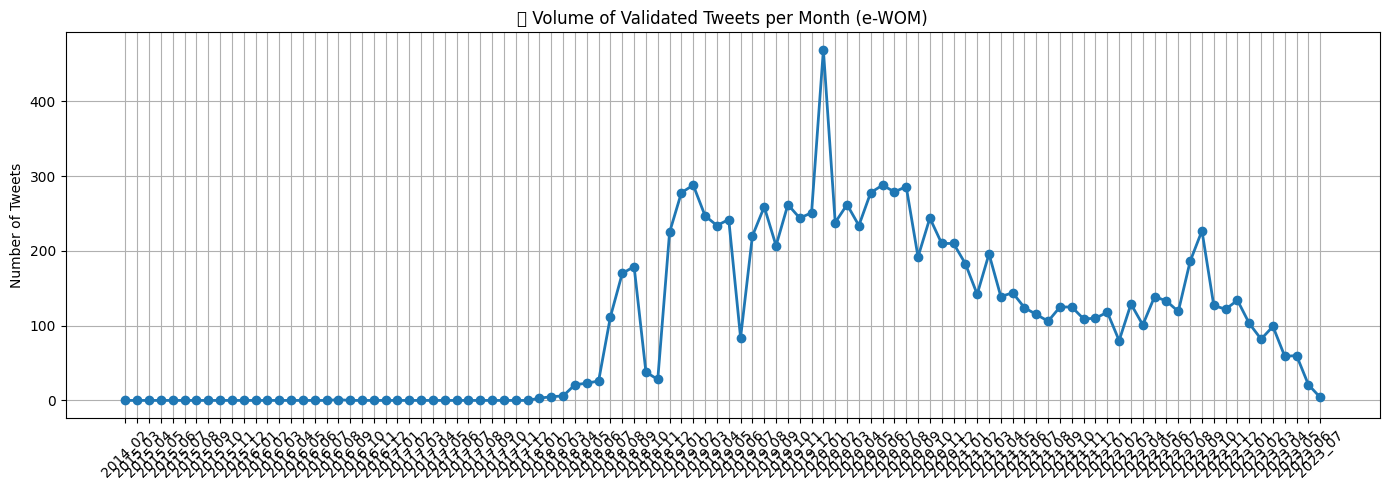

/tmp/ipykernel_2246888/1029058441.py:45: UserWarning: Glyph 128208 (\N{TRIANGULAR RULER}) missing from current font.
  plt.tight_layout()
/n/home03/rpereiraalbuquerque/meu_ambiente_bertopic/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128208 (\N{TRIANGULAR RULER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


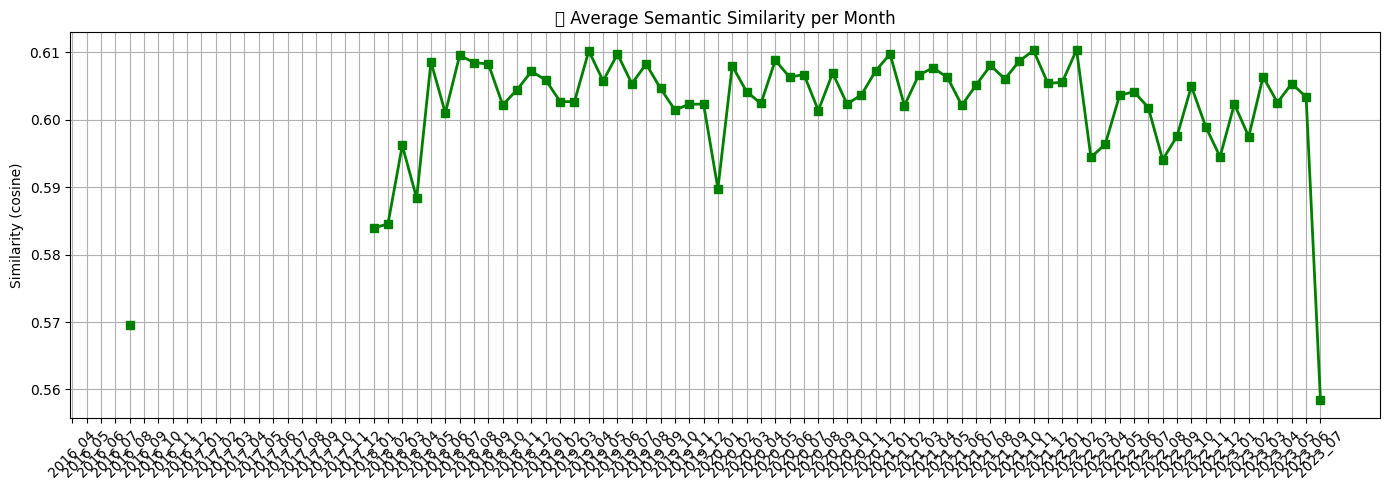

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to validated tweets
validated_path = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/"
files = sorted([f for f in os.listdir(validated_path) if f.endswith(".csv.gz")])

# Aggregate data by month
data = []
for file in files:
    try:
        df = pd.read_csv(os.path.join(validated_path, file))
        year_month = file.replace("tweets_tramontina_", "").replace(".csv.gz", "")
        data.append({
            "year_month": year_month,
            "n_tweets": len(df),
            "mean_similarity": df["similarity"].mean(),
            "std_similarity": df["similarity"].std()
        })
    except Exception as e:
        print(f"❌ Error processing {file}: {e}", flush=True)
        continue

# Create summary DataFrame
df_summary = pd.DataFrame(data).sort_values("year_month")

# 📊 Volume of validated tweets per month
plt.figure(figsize=(14, 5))
plt.plot(df_summary["year_month"], df_summary["n_tweets"], marker="o", linewidth=2)
plt.xticks(rotation=45)
plt.title("📈 Volume of Validated Tweets per Month (e-WOM)")
plt.ylabel("Number of Tweets")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📊 Average semantic similarity per month
plt.figure(figsize=(14, 5))
plt.plot(df_summary["year_month"], df_summary["mean_similarity"], marker="s", color="green", linewidth=2)
plt.xticks(rotation=45)
plt.title("📐 Average Semantic Similarity per Month")
plt.ylabel("Similarity (cosine)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import os
import pandas as pd
import random

# Path to the folder containing validated tweet files
validated_folder = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/"

# List all available .csv.gz files
files = [f for f in os.listdir(validated_folder) if f.endswith(".csv.gz")]

# Select a random file
random_file = random.choice(files)
print(f"📂 Selected file: {random_file}")

# Load only the header to preview columns
file_path = os.path.join(validated_folder, random_file)
df = pd.read_csv(file_path, nrows=5)  # Load only the first few rows
print("\n🧾 Available columns:")
print(df.columns.tolist())

📂 Selected file: tweets_tramontina_2022_09.csv.gz

🧾 Available columns:
['message_id', 'date', 'text', 'tags', 'tweet_lang', 'source', 'place', 'geom', 'retweets', 'tweet_favorites', 'photo_url', 'quoted_status_id', 'user_id', 'user_name', 'user_location', 'followers', 'friends', 'user_favorites', 'status', 'user_lang', 'latitude', 'longitude', 'data_source', 'GPS', 'spatialerror', 'similarity']


In [ ]:
## 🤖 ✅ Block 6 — Custom Sentiment Analysis (Hugging Face + GPU)

In [ ]:
import sys
!{sys.executable} -m pip install --upgrade protobuf tiktoken
!{sys.executable} -m pip install --upgrade transformers sentencepiece

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [ ]:
# ✅ Block 6 — Sentiment Analysis with Hugging Face (final version)
import os
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import torch
from tqdm import tqdm

# Input and output directories
input_dir = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados/"
output_dir = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/"
os.makedirs(output_dir, exist_ok=True)

# Detect GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🧠 Using device: {device}")

# Load sentiment model from Hugging Face
MODEL_NAME = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME).to(device)
sentiment_fn = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, device=0 if device == "cuda" else -1)

# Robust sentiment analysis function
def analyze_sentiment(text):
    try:
        result = sentiment_fn(text[:512])[0]
        return result.get("score", None)
    except:
        return None

# Generate list of files (Jan 2010 to Jul 2023)
year_month_pairs = [
    (year, month) for year in range(2010, 2024)
    for month in range(1, 13)
    if not (year == 2023 and month > 7)
]

# Process each file
for year, month in tqdm(year_month_pairs, desc="🔍 Analyzing sentiment per month"):
    file_name = f"tweets_tramontina_{year}_{month:02d}.csv.gz"
    path_in = os.path.join(input_dir, file_name)
    path_out = os.path.join(output_dir, file_name)

    if not os.path.exists(path_in):
        print(f"❌ File not found: {file_name}")
        continue

    try:
        df = pd.read_csv(path_in)
        if "text" not in df.columns or df.empty:
            print(f"⚠️ {file_name} skipped (missing 'text' column or empty file)")
            continue

        print(f"📦 Processing {file_name} — {len(df)} tweets")
        df["score"] = df["text"].astype(str).apply(analyze_sentiment)
        df.to_csv(path_out, index=False, compression="gzip")
        print(f"✅ Sentiment scores saved to: {path_out}\n")

    except Exception as e:
        print(f"⚠️ Error processing {file_name}: {e}")

🧠 Using device: cuda


🔍 Analyzing sentiment per month:  49%|████▉     | 80/163 [00:00<00:00, 445.33it/s]

❌ File not found: tweets_tramontina_2010_01.csv.gz
❌ File not found: tweets_tramontina_2010_02.csv.gz
❌ File not found: tweets_tramontina_2010_03.csv.gz
❌ File not found: tweets_tramontina_2010_04.csv.gz
❌ File not found: tweets_tramontina_2010_05.csv.gz
❌ File not found: tweets_tramontina_2010_06.csv.gz
❌ File not found: tweets_tramontina_2010_07.csv.gz
❌ File not found: tweets_tramontina_2010_08.csv.gz
❌ File not found: tweets_tramontina_2010_09.csv.gz
❌ File not found: tweets_tramontina_2010_10.csv.gz
❌ File not found: tweets_tramontina_2010_11.csv.gz
❌ File not found: tweets_tramontina_2010_12.csv.gz
❌ File not found: tweets_tramontina_2011_01.csv.gz
❌ File not found: tweets_tramontina_2011_02.csv.gz
❌ File not found: tweets_tramontina_2011_03.csv.gz
❌ File not found: tweets_tramontina_2011_04.csv.gz
❌ File not found: tweets_tramontina_2011_05.csv.gz
❌ File not found: tweets_tramontina_2011_06.csv.gz
❌ File not found: tweets_tramontina_2011_07.csv.gz
❌ File not found: tweets_tramon

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


⚠️ tweets_tramontina_2017_04.csv.gz skipped (missing 'text' column or empty file)
⚠️ tweets_tramontina_2017_05.csv.gz skipped (missing 'text' column or empty file)
⚠️ tweets_tramontina_2017_06.csv.gz skipped (missing 'text' column or empty file)
⚠️ tweets_tramontina_2017_07.csv.gz skipped (missing 'text' column or empty file)
⚠️ tweets_tramontina_2017_08.csv.gz skipped (missing 'text' column or empty file)
⚠️ tweets_tramontina_2017_09.csv.gz skipped (missing 'text' column or empty file)
⚠️ tweets_tramontina_2017_10.csv.gz skipped (missing 'text' column or empty file)
⚠️ tweets_tramontina_2017_11.csv.gz skipped (missing 'text' column or empty file)
⚠️ tweets_tramontina_2017_12.csv.gz skipped (missing 'text' column or empty file)
📦 Processing tweets_tramontina_2018_01.csv.gz — 3 tweets
✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2018_01.csv.gz

📦 Processing tweets_tramontina_2018_02.csv.gz — 5 tweets
✅ Sentiment 

🔍 Analyzing sentiment per month:  71%|███████   | 116/163 [00:13<00:06,  6.87it/s]

✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2019_08.csv.gz

📦 Processing tweets_tramontina_2019_09.csv.gz — 207 tweets


🔍 Analyzing sentiment per month:  72%|███████▏  | 117/163 [00:14<00:07,  6.31it/s]

✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2019_09.csv.gz

📦 Processing tweets_tramontina_2019_10.csv.gz — 262 tweets
✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2019_10.csv.gz

📦 Processing tweets_tramontina_2019_11.csv.gz — 244 tweets
✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2019_11.csv.gz

📦 Processing tweets_tramontina_2019_12.csv.gz — 251 tweets
✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2019_12.csv.gz

📦 Processing tweets_tramontina_2020_01.csv.gz — 469 tweets
✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2020_01.csv.gz

📦 Processing tweets_tramontina_2020_02.csv.gz — 238 tweets
✅ Sentiment scores saved 

🔍 Analyzing sentiment per month:  72%|███████▏  | 117/163 [00:26<00:07,  6.31it/s]

✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2020_06.csv.gz

📦 Processing tweets_tramontina_2020_07.csv.gz — 279 tweets


🔍 Analyzing sentiment per month:  78%|███████▊  | 127/163 [00:27<00:13,  2.68it/s]

✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2020_07.csv.gz

📦 Processing tweets_tramontina_2020_08.csv.gz — 286 tweets


🔍 Analyzing sentiment per month:  79%|███████▊  | 128/163 [00:29<00:13,  2.51it/s]

✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2020_08.csv.gz

📦 Processing tweets_tramontina_2020_09.csv.gz — 192 tweets
✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2020_09.csv.gz

📦 Processing tweets_tramontina_2020_10.csv.gz — 244 tweets
✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2020_10.csv.gz

📦 Processing tweets_tramontina_2020_11.csv.gz — 210 tweets
✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2020_11.csv.gz

📦 Processing tweets_tramontina_2020_12.csv.gz — 210 tweets
✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2020_12.csv.gz

📦 Processing tweets_tramontina_2021_01.csv.gz — 183 tweets
✅ Sentiment scores saved 

🔍 Analyzing sentiment per month:  85%|████████▌ | 139/163 [00:38<00:12,  1.92it/s]

✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2021_07.csv.gz

📦 Processing tweets_tramontina_2021_08.csv.gz — 106 tweets
✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2021_08.csv.gz

📦 Processing tweets_tramontina_2021_09.csv.gz — 125 tweets
✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2021_09.csv.gz

📦 Processing tweets_tramontina_2021_10.csv.gz — 125 tweets
✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2021_10.csv.gz

📦 Processing tweets_tramontina_2021_11.csv.gz — 109 tweets
✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2021_11.csv.gz

📦 Processing tweets_tramontina_2021_12.csv.gz — 110 tweets
✅ Sentiment scores saved 

🔍 Analyzing sentiment per month:  90%|████████▉ | 146/163 [00:42<00:08,  1.91it/s]

✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2022_02.csv.gz

📦 Processing tweets_tramontina_2022_03.csv.gz — 129 tweets
✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2022_03.csv.gz

📦 Processing tweets_tramontina_2022_04.csv.gz — 101 tweets
✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2022_04.csv.gz

📦 Processing tweets_tramontina_2022_05.csv.gz — 139 tweets
✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2022_05.csv.gz

📦 Processing tweets_tramontina_2022_06.csv.gz — 133 tweets


🔍 Analyzing sentiment per month:  92%|█████████▏| 150/163 [00:44<00:06,  1.87it/s]

✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2022_06.csv.gz

📦 Processing tweets_tramontina_2022_07.csv.gz — 119 tweets
✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2022_07.csv.gz

📦 Processing tweets_tramontina_2022_08.csv.gz — 186 tweets
✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2022_08.csv.gz

📦 Processing tweets_tramontina_2022_09.csv.gz — 227 tweets


🔍 Analyzing sentiment per month:  94%|█████████▍| 153/163 [00:47<00:05,  1.73it/s]

✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2022_09.csv.gz

📦 Processing tweets_tramontina_2022_10.csv.gz — 127 tweets
✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2022_10.csv.gz

📦 Processing tweets_tramontina_2022_11.csv.gz — 122 tweets


🔍 Analyzing sentiment per month:  95%|█████████▌| 155/163 [00:48<00:04,  1.72it/s]

✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2022_11.csv.gz

📦 Processing tweets_tramontina_2022_12.csv.gz — 134 tweets
✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2022_12.csv.gz

📦 Processing tweets_tramontina_2023_01.csv.gz — 103 tweets


🔍 Analyzing sentiment per month:  96%|█████████▋| 157/163 [00:49<00:03,  1.72it/s]

✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2023_01.csv.gz

📦 Processing tweets_tramontina_2023_02.csv.gz — 82 tweets


🔍 Analyzing sentiment per month:  97%|█████████▋| 158/163 [00:50<00:02,  1.77it/s]

✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2023_02.csv.gz

📦 Processing tweets_tramontina_2023_03.csv.gz — 99 tweets


🔍 Analyzing sentiment per month:  98%|█████████▊| 159/163 [00:50<00:02,  1.80it/s]

✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2023_03.csv.gz

📦 Processing tweets_tramontina_2023_04.csv.gz — 59 tweets


🔍 Analyzing sentiment per month:  98%|█████████▊| 160/163 [00:50<00:01,  1.93it/s]

✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2023_04.csv.gz

📦 Processing tweets_tramontina_2023_05.csv.gz — 60 tweets


🔍 Analyzing sentiment per month: 100%|██████████| 163/163 [00:51<00:00,  3.18it/s]

✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2023_05.csv.gz

📦 Processing tweets_tramontina_2023_06.csv.gz — 21 tweets
✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2023_06.csv.gz

📦 Processing tweets_tramontina_2023_07.csv.gz — 4 tweets
✅ Sentiment scores saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2023_07.csv.gz



In [ ]:
## Block 6 Verification

In [ ]:
import pandas as pd
import os

# ✅ Updated path to tweets with sentiment scores (v4)
file_path = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2020_01.csv.gz"

# Check if the file exists
if os.path.exists(file_path):
    df = pd.read_csv(file_path, compression="gzip")
    print(f"🔍 {len(df)} tweets found in {file_path}")
    print(df.head())
else:
    print(f"❌ File not found: {file_path}")

🔍 469 tweets found in /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/tweets_tramontina_2020_01.csv.gz
            message_id                 date  \
0  1212281018138419201  2020-01-01 07:54:52   
1  1212306231014105088  2020-01-01 09:35:03   
2  1212355449544204288  2020-01-01 12:50:38   
3  1212521730280972290  2020-01-01 23:51:22   
4  1212555961161916421  2020-01-02 02:07:23   

                                                text tags tweet_lang  \
0  Por algum motivo eu achei que a tomada era o a...  NaN         pt   
1  Não tenho como entrar em casa, tô numa constru...  NaN         pt   
2  Que legal meu secador queimo pois não vi que a...  NaN         pt   
3  @rge_cpflenergia alooo rge tá dando curto circ...  NaN         pt   
4                            sou tomada por preguiça  NaN         pt   

                                              source                   place  \
0  <a href="http://twitter.com/download/android" ...  Belo Horizonte, Brasil

In [ ]:
## ✅ Block 7 — Geographic Mapping by Municipality

In [ ]:
## ✅ Block 7 — Geographic Mapping by Municipality (updated version)

import os
import gzip
import json
import requests
import pandas as pd
from tqdm import tqdm
from shapely.geometry import Point, shape

# Updated directories
input_dir = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/"
output_dir = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/mapped_municipalities_v1/"
os.makedirs(output_dir, exist_ok=True)

# 🔗 Simplified GeoJSON of Brazilian municipalities
url_geojson = "https://raw.githubusercontent.com/dadosfera/brasil-municipios-geojson/refs/heads/main/geojs-100-mun-v2.json"
print("🔄 Downloading simplified municipality shapefile...")
geojson_data = requests.get(url_geojson).json()

# ⛳️ Create list of polygons with municipality names
municipalities = []
for feature in geojson_data["features"]:
    name = feature["properties"]["name"]
    polygon = shape(feature["geometry"])
    municipalities.append((name, polygon))

# 📁 Files to process
files = sorted([f for f in os.listdir(input_dir) if f.endswith(".csv.gz")])
print(f"📦 {len(files)} files found for geographic mapping.\n")

# 🔁 Mapping loop
for file in tqdm(files, desc="Mapping tweets by municipality"):
    path_in = os.path.join(input_dir, file)
    path_out = os.path.join(output_dir, file)

    try:
        df = pd.read_csv(path_in, compression="gzip")

        if "latitude" not in df.columns or "longitude" not in df.columns:
            print(f"⚠️ Coordinate columns missing in: {file}")
            continue

        # 📌 Location function
        def locate_municipality(row):
            point = Point(row["longitude"], row["latitude"])
            for name, polygon in municipalities:
                if polygon.contains(point):
                    return name
            return "Undefined"

        df["municipality"] = df.apply(locate_municipality, axis=1)

        df.to_csv(path_out, index=False, compression="gzip")
        print(f"✅ Mapped and saved: {file}")

    except Exception as e:
        print(f"❌ Error processing {file} — {e}")

🔄 Downloading simplified municipality shapefile...
📦 68 files found for geographic mapping.



Mapping tweets by municipality:   3%|▎         | 2/68 [00:00<00:04, 15.43it/s]

✅ Mapped and saved: tweets_tramontina_2016_08.csv.gz
✅ Mapped and saved: tweets_tramontina_2018_01.csv.gz
✅ Mapped and saved: tweets_tramontina_2018_02.csv.gz


Mapping tweets by municipality:   6%|▌         | 4/68 [00:00<00:05, 10.91it/s]

✅ Mapped and saved: tweets_tramontina_2018_03.csv.gz
✅ Mapped and saved: tweets_tramontina_2018_04.csv.gz


Mapping tweets by municipality:   9%|▉         | 6/68 [00:01<00:16,  3.78it/s]

✅ Mapped and saved: tweets_tramontina_2018_05.csv.gz


Mapping tweets by municipality:  10%|█         | 7/68 [00:01<00:20,  3.05it/s]

✅ Mapped and saved: tweets_tramontina_2018_06.csv.gz


Mapping tweets by municipality:  12%|█▏        | 8/68 [00:04<00:53,  1.13it/s]

✅ Mapped and saved: tweets_tramontina_2018_07.csv.gz


Mapping tweets by municipality:  13%|█▎        | 9/68 [00:07<01:36,  1.63s/it]

✅ Mapped and saved: tweets_tramontina_2018_08.csv.gz


Mapping tweets by municipality:  15%|█▍        | 10/68 [00:11<02:09,  2.24s/it]

✅ Mapped and saved: tweets_tramontina_2018_09.csv.gz


Mapping tweets by municipality:  16%|█▌        | 11/68 [00:12<01:44,  1.84s/it]

✅ Mapped and saved: tweets_tramontina_2018_10.csv.gz


Mapping tweets by municipality:  18%|█▊        | 12/68 [00:13<01:22,  1.48s/it]

✅ Mapped and saved: tweets_tramontina_2018_11.csv.gz


Mapping tweets by municipality:  19%|█▉        | 13/68 [00:17<02:12,  2.41s/it]

✅ Mapped and saved: tweets_tramontina_2018_12.csv.gz


Mapping tweets by municipality:  21%|██        | 14/68 [00:23<03:03,  3.39s/it]

✅ Mapped and saved: tweets_tramontina_2019_01.csv.gz


Mapping tweets by municipality:  22%|██▏       | 15/68 [00:29<03:38,  4.12s/it]

✅ Mapped and saved: tweets_tramontina_2019_02.csv.gz


Mapping tweets by municipality:  24%|██▎       | 16/68 [00:34<03:47,  4.38s/it]

✅ Mapped and saved: tweets_tramontina_2019_03.csv.gz


Mapping tweets by municipality:  25%|██▌       | 17/68 [00:39<03:52,  4.56s/it]

✅ Mapped and saved: tweets_tramontina_2019_04.csv.gz


Mapping tweets by municipality:  26%|██▋       | 18/68 [00:44<03:54,  4.69s/it]

✅ Mapped and saved: tweets_tramontina_2019_05.csv.gz


Mapping tweets by municipality:  28%|██▊       | 19/68 [00:46<03:06,  3.80s/it]

✅ Mapped and saved: tweets_tramontina_2019_06.csv.gz


Mapping tweets by municipality:  29%|██▉       | 20/68 [00:50<03:16,  4.09s/it]

✅ Mapped and saved: tweets_tramontina_2019_07.csv.gz


Mapping tweets by municipality:  31%|███       | 21/68 [00:56<03:27,  4.41s/it]

✅ Mapped and saved: tweets_tramontina_2019_08.csv.gz


Mapping tweets by municipality:  32%|███▏      | 22/68 [01:00<03:20,  4.36s/it]

✅ Mapped and saved: tweets_tramontina_2019_09.csv.gz


Mapping tweets by municipality:  34%|███▍      | 23/68 [01:05<03:29,  4.66s/it]

✅ Mapped and saved: tweets_tramontina_2019_10.csv.gz


Mapping tweets by municipality:  35%|███▌      | 24/68 [01:10<03:29,  4.77s/it]

✅ Mapped and saved: tweets_tramontina_2019_11.csv.gz


Mapping tweets by municipality:  37%|███▋      | 25/68 [01:15<03:27,  4.83s/it]

✅ Mapped and saved: tweets_tramontina_2019_12.csv.gz


Mapping tweets by municipality:  38%|███▊      | 26/68 [01:26<04:45,  6.79s/it]

✅ Mapped and saved: tweets_tramontina_2020_01.csv.gz


Mapping tweets by municipality:  40%|███▉      | 27/68 [01:31<04:15,  6.22s/it]

✅ Mapped and saved: tweets_tramontina_2020_02.csv.gz


Mapping tweets by municipality:  41%|████      | 28/68 [01:37<03:56,  5.91s/it]

✅ Mapped and saved: tweets_tramontina_2020_03.csv.gz


Mapping tweets by municipality:  43%|████▎     | 29/68 [01:41<03:32,  5.44s/it]

✅ Mapped and saved: tweets_tramontina_2020_04.csv.gz


Mapping tweets by municipality:  44%|████▍     | 30/68 [01:46<03:24,  5.38s/it]

✅ Mapped and saved: tweets_tramontina_2020_05.csv.gz


Mapping tweets by municipality:  46%|████▌     | 31/68 [01:52<03:22,  5.48s/it]

✅ Mapped and saved: tweets_tramontina_2020_06.csv.gz


Mapping tweets by municipality:  47%|████▋     | 32/68 [01:57<03:18,  5.52s/it]

✅ Mapped and saved: tweets_tramontina_2020_07.csv.gz


Mapping tweets by municipality:  49%|████▊     | 33/68 [02:03<03:13,  5.54s/it]

✅ Mapped and saved: tweets_tramontina_2020_08.csv.gz


Mapping tweets by municipality:  50%|█████     | 34/68 [02:07<02:51,  5.05s/it]

✅ Mapped and saved: tweets_tramontina_2020_09.csv.gz


Mapping tweets by municipality:  51%|█████▏    | 35/68 [02:12<02:44,  4.97s/it]

✅ Mapped and saved: tweets_tramontina_2020_10.csv.gz


Mapping tweets by municipality:  53%|█████▎    | 36/68 [02:15<02:25,  4.55s/it]

✅ Mapped and saved: tweets_tramontina_2020_11.csv.gz


Mapping tweets by municipality:  54%|█████▍    | 37/68 [02:19<02:16,  4.39s/it]

✅ Mapped and saved: tweets_tramontina_2020_12.csv.gz


Mapping tweets by municipality:  56%|█████▌    | 38/68 [02:23<02:03,  4.13s/it]

✅ Mapped and saved: tweets_tramontina_2021_01.csv.gz


Mapping tweets by municipality:  57%|█████▋    | 39/68 [02:26<01:49,  3.78s/it]

✅ Mapped and saved: tweets_tramontina_2021_02.csv.gz


Mapping tweets by municipality:  59%|█████▉    | 40/68 [02:30<01:45,  3.78s/it]

✅ Mapped and saved: tweets_tramontina_2021_03.csv.gz


Mapping tweets by municipality:  60%|██████    | 41/68 [02:33<01:36,  3.58s/it]

✅ Mapped and saved: tweets_tramontina_2021_04.csv.gz


Mapping tweets by municipality:  62%|██████▏   | 42/68 [02:36<01:27,  3.36s/it]

✅ Mapped and saved: tweets_tramontina_2021_05.csv.gz


Mapping tweets by municipality:  63%|██████▎   | 43/68 [02:38<01:16,  3.07s/it]

✅ Mapped and saved: tweets_tramontina_2021_06.csv.gz


Mapping tweets by municipality:  65%|██████▍   | 44/68 [02:40<01:08,  2.84s/it]

✅ Mapped and saved: tweets_tramontina_2021_07.csv.gz


Mapping tweets by municipality:  66%|██████▌   | 45/68 [02:42<01:00,  2.63s/it]

✅ Mapped and saved: tweets_tramontina_2021_08.csv.gz


Mapping tweets by municipality:  68%|██████▊   | 46/68 [02:45<00:56,  2.55s/it]

✅ Mapped and saved: tweets_tramontina_2021_09.csv.gz


Mapping tweets by municipality:  69%|██████▉   | 47/68 [02:47<00:52,  2.51s/it]

✅ Mapped and saved: tweets_tramontina_2021_10.csv.gz


Mapping tweets by municipality:  71%|███████   | 48/68 [02:49<00:46,  2.35s/it]

✅ Mapped and saved: tweets_tramontina_2021_11.csv.gz


Mapping tweets by municipality:  72%|███████▏  | 49/68 [02:51<00:43,  2.30s/it]

✅ Mapped and saved: tweets_tramontina_2021_12.csv.gz


Mapping tweets by municipality:  74%|███████▎  | 50/68 [02:54<00:41,  2.29s/it]

✅ Mapped and saved: tweets_tramontina_2022_01.csv.gz


Mapping tweets by municipality:  75%|███████▌  | 51/68 [02:55<00:35,  2.09s/it]

✅ Mapped and saved: tweets_tramontina_2022_02.csv.gz


Mapping tweets by municipality:  76%|███████▋  | 52/68 [02:58<00:35,  2.24s/it]

✅ Mapped and saved: tweets_tramontina_2022_03.csv.gz


Mapping tweets by municipality:  78%|███████▊  | 53/68 [03:00<00:32,  2.18s/it]

✅ Mapped and saved: tweets_tramontina_2022_04.csv.gz


Mapping tweets by municipality:  79%|███████▉  | 54/68 [03:03<00:33,  2.38s/it]

✅ Mapped and saved: tweets_tramontina_2022_05.csv.gz


Mapping tweets by municipality:  81%|████████  | 55/68 [03:05<00:31,  2.44s/it]

✅ Mapped and saved: tweets_tramontina_2022_06.csv.gz


Mapping tweets by municipality:  82%|████████▏ | 56/68 [03:07<00:27,  2.32s/it]

✅ Mapped and saved: tweets_tramontina_2022_07.csv.gz


Mapping tweets by municipality:  84%|████████▍ | 57/68 [03:11<00:29,  2.64s/it]

✅ Mapped and saved: tweets_tramontina_2022_08.csv.gz


Mapping tweets by municipality:  85%|████████▌ | 58/68 [03:15<00:31,  3.16s/it]

✅ Mapped and saved: tweets_tramontina_2022_09.csv.gz


Mapping tweets by municipality:  87%|████████▋ | 59/68 [03:17<00:26,  2.90s/it]

✅ Mapped and saved: tweets_tramontina_2022_10.csv.gz


Mapping tweets by municipality:  88%|████████▊ | 60/68 [03:20<00:21,  2.72s/it]

✅ Mapped and saved: tweets_tramontina_2022_11.csv.gz


Mapping tweets by municipality:  90%|████████▉ | 61/68 [03:22<00:18,  2.67s/it]

✅ Mapped and saved: tweets_tramontina_2022_12.csv.gz


Mapping tweets by municipality:  91%|█████████ | 62/68 [03:24<00:14,  2.49s/it]

✅ Mapped and saved: tweets_tramontina_2023_01.csv.gz


Mapping tweets by municipality:  93%|█████████▎| 63/68 [03:26<00:10,  2.18s/it]

✅ Mapped and saved: tweets_tramontina_2023_02.csv.gz


Mapping tweets by municipality:  94%|█████████▍| 64/68 [03:27<00:08,  2.03s/it]

✅ Mapped and saved: tweets_tramontina_2023_03.csv.gz


Mapping tweets by municipality:  96%|█████████▌| 65/68 [03:29<00:05,  1.80s/it]

✅ Mapped and saved: tweets_tramontina_2023_04.csv.gz


Mapping tweets by municipality:  97%|█████████▋| 66/68 [03:30<00:03,  1.65s/it]

✅ Mapped and saved: tweets_tramontina_2023_05.csv.gz


Mapping tweets by municipality: 100%|██████████| 68/68 [03:31<00:00,  3.10s/it]

✅ Mapped and saved: tweets_tramontina_2023_06.csv.gz
✅ Mapped and saved: tweets_tramontina_2023_07.csv.gz


In [ ]:
## Block 7 Verification

In [ ]:
## ✅ Verification by City (updated version)

import os
import random
import pandas as pd

# Path to files mapped with sentiment and municipality
mapped_dir = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/mapped_municipalities_v1/"

# List available files
files = [f for f in os.listdir(mapped_dir) if f.endswith(".csv.gz")]

# Select a random file
random_file = random.choice(files)
print(f"📄 Checking random file: {random_file}\n")

# Load the selected file
df = pd.read_csv(os.path.join(mapped_dir, random_file), compression="gzip")

# Display the first rows with the 'municipality' column
print(df.head(10))

📄 Checking random file: tweets_tramontina_2021_04.csv.gz

     message_id                 date  \
0  1.377415e+18  2021-04-01 00:17:40   
1  1.377419e+18  2021-04-01 00:32:32   
2  1.377447e+18  2021-04-01 02:24:02   
3  1.377469e+18  2021-04-01 03:51:09   
4  1.377565e+18  2021-04-01 10:12:27   
5  1.377646e+18  2021-04-01 15:36:06   
6  1.377648e+18  2021-04-01 15:42:31   
7  1.377661e+18  2021-04-01 16:36:19   
8  1.377686e+18  2021-04-01 18:16:07   
9  1.377741e+18  2021-04-01 21:52:13   

                                                text  tags tweet_lang  \
0  Tô achando q vai ter queda de energia ... pq a...   NaN         pt   
1                caiu a luz caiu tudo eu quase morri   NaN         pt   
2                    achei meu adaptador amém senhor   NaN         pt   
3                                    só tomada de cu   NaN         pt   
4  "ovo botá uma borracha e um clipe na tomada" H...   NaN         pt   
5  já estamos vendo algumas coisas básicas para a...   NaN     

In [ ]:
import os
import pandas as pd
from tqdm import tqdm

# Path to the folder with municipality-mapped tweet files
input_dir = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/mapped_municipalities_v1/"

# List of compressed CSV files
files = sorted([f for f in os.listdir(input_dir) if f.endswith(".csv.gz")])

# Counter for total number of rows
total_rows = 0

print("🔍 Counting total rows (tweets) in municipality-mapped files...\n")
for file in tqdm(files):
    file_path = os.path.join(input_dir, file)
    try:
        df = pd.read_csv(file_path, usecols=["message_id"])  # Minimal read for performance
        total_rows += len(df)
    except Exception as e:
        print(f"⚠️ Error processing {file}: {e}")

print(f"\n✅ Total number of rows (tweets) in municipality-mapped files: {total_rows:,}")

🔍 Counting total rows (tweets) in municipality-mapped files...



100%|██████████| 68/68 [00:00<00:00, 425.53it/s]


✅ Total number of rows (tweets) in municipality-mapped files: 10,504


In [ ]:
## ✅ Block 8 — Mapping by Census Tract — EXECUTED VIA TERMINAL FOR PERFORMANCE

In [ ]:
# ✅ DO NOT RUN — Block 8 — Mapping by Census Tract with Multiprocessing

import os
import json
import pandas as pd
from shapely.geometry import Point, shape
from tqdm import tqdm
from multiprocessing import Pool, cpu_count

print(f"🔥 Detected CPU cores: {cpu_count()}")

# Paths
input_dir = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/validados_com_sentimento_v4/"
output_dir = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/mapped_census_tracts_v2/"
geojson_path = "/n/home03/rpereiraalbuquerque/shapes/municipios_simplificados.geojson"

# Load GeoJSON with census tracts
print("📦 Reading census tract GeoJSON...")
with open(geojson_path, 'r', encoding='utf-8') as f:
    census_data = json.load(f)

# Build tract dictionary
tracts = {}
for feature in census_data['features']:
    tract_id = feature['properties'].get('CD_SETOR')
    geometry = shape(feature['geometry'])
    tracts[tract_id] = geometry

print(f"✅ Total census tracts loaded: {len(tracts)}\n")

# Helper function to map a single tweet
def map_one_tweet(tweet):
    try:
        point = Point(tweet["longitude"], tweet["latitude"])
        for tract_id, polygon in tracts.items():
            if polygon.contains(point):
                return tract_id
        return None
    except:
        return None

# Function to process one file
def process_file(filename):
    path_in = os.path.join(input_dir, filename)
    path_out = os.path.join(output_dir, filename)

    try:
        df = pd.read_csv(path_in)
        if "latitude" not in df.columns or "longitude" not in df.columns:
            print(f"⚠️ Coordinates missing in {filename}")
            return

        points = df[["longitude", "latitude"]].to_dict(orient="records")

        with Pool(processes=cpu_count()) as pool:
            mapped_tracts = list(pool.map(map_one_tweet, points))

        df["CD_SETOR"] = mapped_tracts
        df["mapped_tract"] = df["CD_SETOR"].notna()
        df.to_csv(path_out, index=False, compression="gzip")

        print(f"✅ Mapped and saved: {filename}")
    except Exception as e:
        print(f"❌ Error in {filename}: {e}")

# Create output directory
os.makedirs(output_dir, exist_ok=True)

# Run all files (each one is processed in parallel internally)
files = sorted([f for f in os.listdir(input_dir) if f.endswith(".csv.gz")])
print(f"🔍 {len(files)} files found for census tract mapping.\n")

for filename in tqdm(files, desc="Mapping tweets by census tract"):
    process_file(filename)

In [ ]:
!pip install shapely==1.7.1

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import os
import pandas as pd
import random

# Path to census tract-mapped files
output_dir = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/mapeado_setores_v2/"

# List only files from 2023
arquivos_2023 = sorted([f for f in os.listdir(output_dir) if f.startswith("tweets_tramontina_2023") and f.endswith(".csv.gz")])

# Select a random file from 2023
arquivo_escolhido = random.choice(arquivos_2023)
print(f"\n📅 Verificando mês aleatório de 2023: {arquivo_escolhido}")  # 👈 Mantido em português

# Read the file
df = pd.read_csv(os.path.join(output_dir, arquivo_escolhido), compression="gzip")

# Display the first rows with census tract info
print(df[["text", "latitude", "longitude", "CD_SETOR"]].head(10))  # 👈 Mantido como está


📅 Verificando mês aleatório de 2023: tweets_tramontina_2023_05.csv.gz
                                                text   latitude  longitude  \
0  Inclusive, sou autor de um projeto (PL 612/19)... -15.776254 -47.796623   
1  Matéria do #BomDiaDF mostrou a absurda situaçã... -15.776254 -47.796623   
2  Encostei no fio do interruptor sem querer e pe... -23.616569 -46.318826   
3  achei que tinha queimado a máquina de lavar, m... -22.821465 -43.018208   
4               Acabei de gozar usando o plug...amo💦 -22.911422 -43.441578   
5  Passei o dia na casa q está acabando a constru...  -9.758083 -36.647306   
6  Três meses morando nesse apartamento ainda n d... -26.860235 -53.491044   
7  passei um tempão ansiosa pra minha pipoqueira ...  -7.149477 -34.883371   
8           como q eu explico que fucinho n é tomada -27.586753 -54.300801   
9  Queria uma indicação de eletricista credenciad... -22.911422 -43.441578   

       CD_SETOR  
0  5.300108e+14  
1  5.300108e+14  
2  3.552502e+14 

In [ ]:
## Output Verification — Block 8

In [ ]:
import pandas as pd
import os

# Path to the folder with census tract-mapped files
output_dir = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/mapeado_setores_v2/"

# Listing the files in the folder
arquivos = [f for f in os.listdir(output_dir) if f.endswith(".csv.gz")]

# Inspecting the first few files
for arq in arquivos[:5]:  # You can adjust the number of files to inspect
    path = os.path.join(output_dir, arq)
    df = pd.read_csv(path, compression='gzip')
    print(f"Primeiras linhas do arquivo {arq}:\n", df.head(), "\n")  # ✅ Mantido em português

Primeiras linhas do arquivo tweets_tramontina_2016_08.csv.gz:
            message_id                 date  \
0  767064964880367616  2016-08-20 18:25:13   

                                                text  tags tweet_lang  \
0  Deu um puta raio e queimou a tomada do modem q...   NaN         pt   

                                              source                  place  \
0  <a href="http://twitter.com/download/iphone" r...  Dois Vizinhos, Brasil   

                               geom  retweets  tweet_favorites  ...  \
0  POINT(-53.05460484 -25.75099146)       0.0              0.0  ...   

   user_lang   latitude  longitude data_source   GPS  spatialerror  \
0         pt -25.750991 -53.054605         {6}  True          10.0   

   similaridade     score  CD_SETOR mapeado_setor  
0      0.569534  0.781398       NaN         False  

[1 rows x 29 columns] 

Primeiras linhas do arquivo tweets_tramontina_2018_01.csv.gz:
            message_id                 date  \
0  9522710548981

In [ ]:
import os
import pandas as pd
from tqdm import tqdm

# Path to the folder with census tract-mapped files
input_dir = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/mapeado_setores_v2/"

# List of compressed CSV files
files = sorted([f for f in os.listdir(input_dir) if f.endswith(".csv.gz")])

# Counter for total number of rows
total_rows = 0

print("🔍 Counting total number of rows (tweets) in census tract-mapped files...\n")
for file in tqdm(files):
    file_path = os.path.join(input_dir, file)
    try:
        df = pd.read_csv(file_path, usecols=["message_id"])  # Minimal read for performance
        total_rows += len(df)
    except Exception as e:
        print(f"⚠️ Error processing {file}: {e}")

print(f"\n✅ Total number of rows (tweets) in census tract-mapped files: {total_rows:,}")

🔍 Counting total number of rows (tweets) in census tract-mapped files...



100%|██████████| 68/68 [00:00<00:00, 302.18it/s]


✅ Total number of rows (tweets) in census tract-mapped files: 10,504


In [ ]:
## ✅ Block 9 — Calculation of GEWI Indices (v1, v2, v3)

In [ ]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

# Path to tweets mapped by census tract
input_dir = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/mapeado_setores_v2/"
output_path = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/gewis_by_tract.csv"

# List of .csv.gz files
files = sorted([f for f in os.listdir(input_dir) if f.endswith(".csv.gz")])

# List to store results
results = []

print("📊 Calculating GEWI v1, v2, and v3 by census tract...\n")

for file in tqdm(files, desc="Processing files"):
    df = pd.read_csv(os.path.join(input_dir, file), compression="gzip")

    if "CD_SETOR" not in df.columns or df.empty:
        continue

    # Create auxiliary columns
    df["followers_log"] = np.log1p(df["followers"])
    df["year_month"] = file.replace("tweets_tramontina_", "").replace(".csv.gz", "")

    # Grouping by census tract
    for tract_id, group in df.groupby("CD_SETOR"):
        n_total = len(group)
        mean_sentiment = group["score"].mean()
        log_volume = np.log1p(n_total)
        gewi_v1 = mean_sentiment * log_volume

        # v2 - positive and negative polarity
        positives = group[group["score"] >= 0.5]
        negatives = group[group["score"] < 0.5]

        n_pos = len(positives)
        n_neg = len(negatives)

        gewi_pos = positives["score"].mean() * np.log1p(n_pos) if n_pos > 0 else 0
        gewi_neg = negatives["score"].mean() * np.log1p(n_neg) if n_neg > 0 else 0

        # v3 - weighted by log(followers)
        weights = group["followers_log"].fillna(0)
        weighted_avg = np.average(group["score"], weights=weights) if weights.sum() > 0 else group["score"].mean()
        gewi_v3 = weighted_avg * log_volume

        results.append({
            "year_month": group["year_month"].iloc[0],
            "CD_SETOR": tract_id,
            "GEWI_v1": gewi_v1,
            "GEWI_v2_pos": gewi_pos,
            "GEWI_v2_neg": gewi_neg,
            "GEWI_v3": gewi_v3,
            "tweet_volume": n_total
        })

# Build final DataFrame
df_gewis = pd.DataFrame(results)
df_gewis.to_csv(output_path, index=False)
print(f"\n✅ GEWI indices saved to: {output_path}")

📊 Calculating GEWI v1, v2, and v3 by census tract...



Processing files: 100%|██████████| 68/68 [00:04<00:00, 14.92it/s]


✅ GEWI indices saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/gewis_by_tract.csv


In [ ]:
## ✅ Code for Visualization of GEWI Results

In [ ]:
import pandas as pd

# Path to the CSV file with GEWI scores by census tract
gewis_path = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/gewis_by_tract.csv"

# Load the data
df = pd.read_csv(gewis_path)

# Display available columns
print("🧾 Available columns in the file:")
print(df.columns.tolist())

# Show a sample of the data
print("\n🔍 Sample data preview:")
print(df.head())

🧾 Available columns in the file:
['year_month', 'CD_SETOR', 'GEWI_v1', 'GEWI_v2_pos', 'GEWI_v2_neg', 'GEWI_v3', 'tweet_volume']

🔍 Sample data preview:
  year_month      CD_SETOR   GEWI_v1  GEWI_v2_pos  GEWI_v2_neg   GEWI_v3  \
0    2018_01  4.100103e+14  0.284640          0.0     0.284640  0.284640   
1    2018_01  4.311759e+14  0.162318          0.0     0.162318  0.162318   
2    2018_01  5.208707e+14  0.215890          0.0     0.215890  0.215890   
3    2018_02  3.108909e+14  0.285605          0.0     0.285605  0.285605   
4    2018_02  3.169307e+14  0.194789          0.0     0.194789  0.194789   

   tweet_volume  
0             1  
1             1  
2             1  
3             1  
4             1  


In [ ]:
## ✅ Code for Visualization of GEWI v1, v2, and v3 Results (by Month)

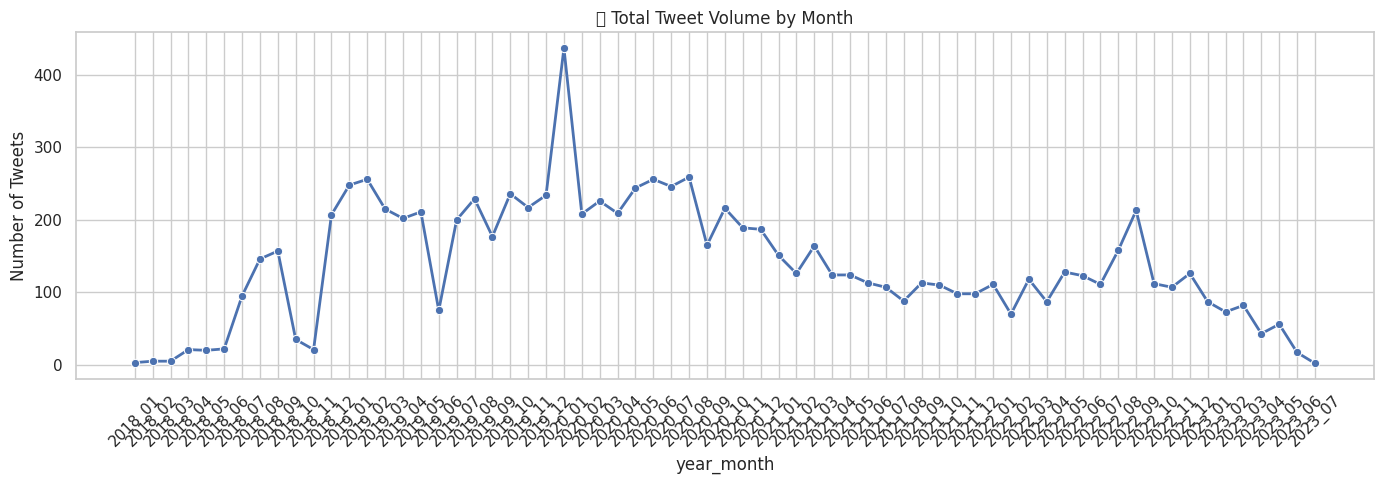

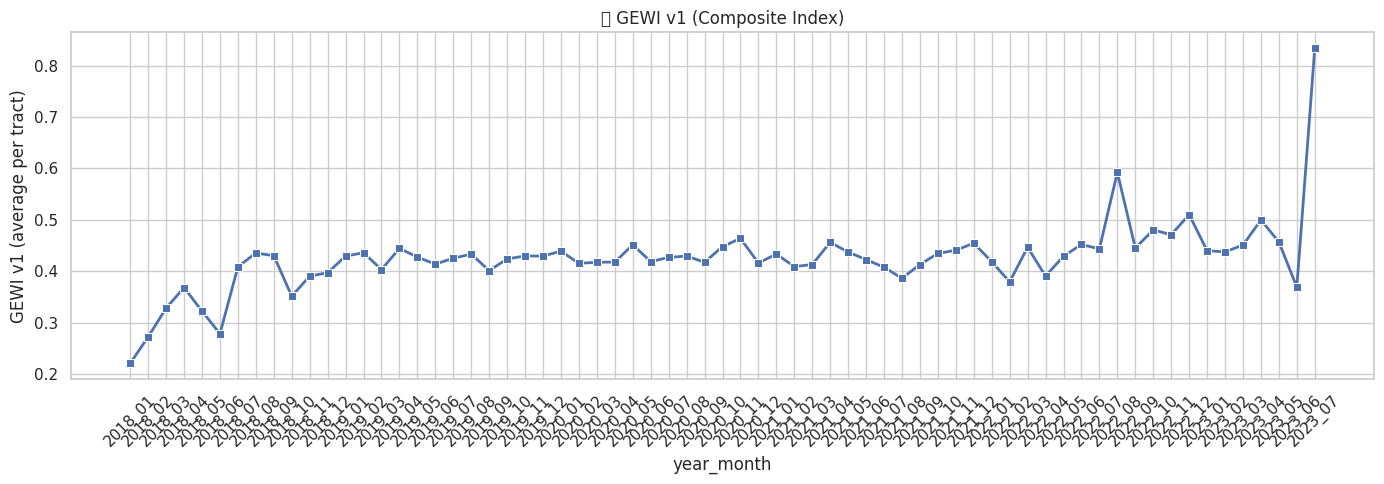

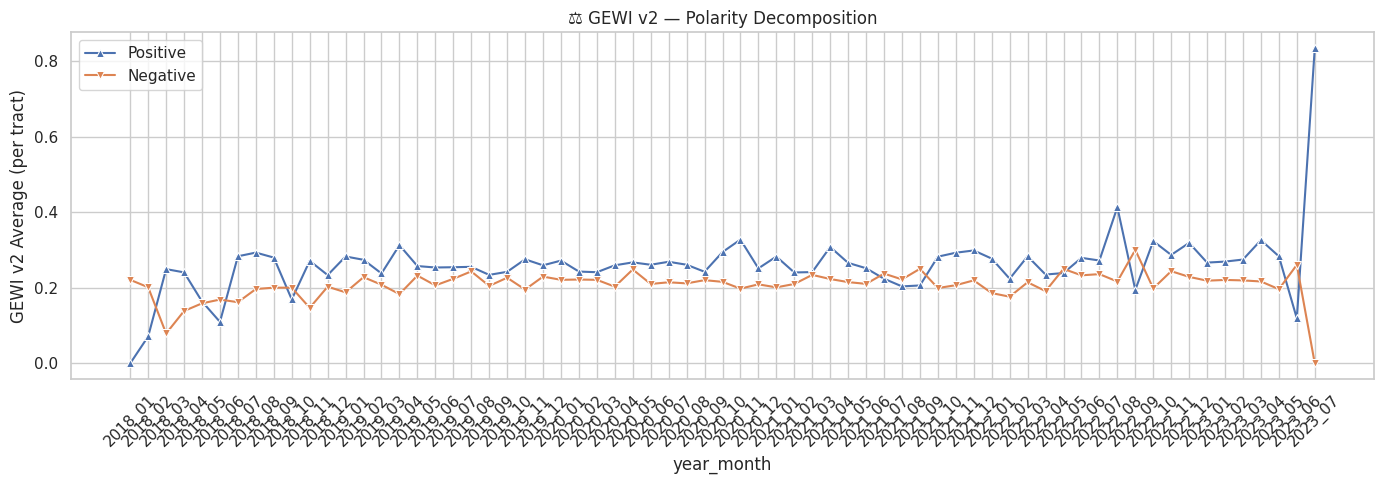

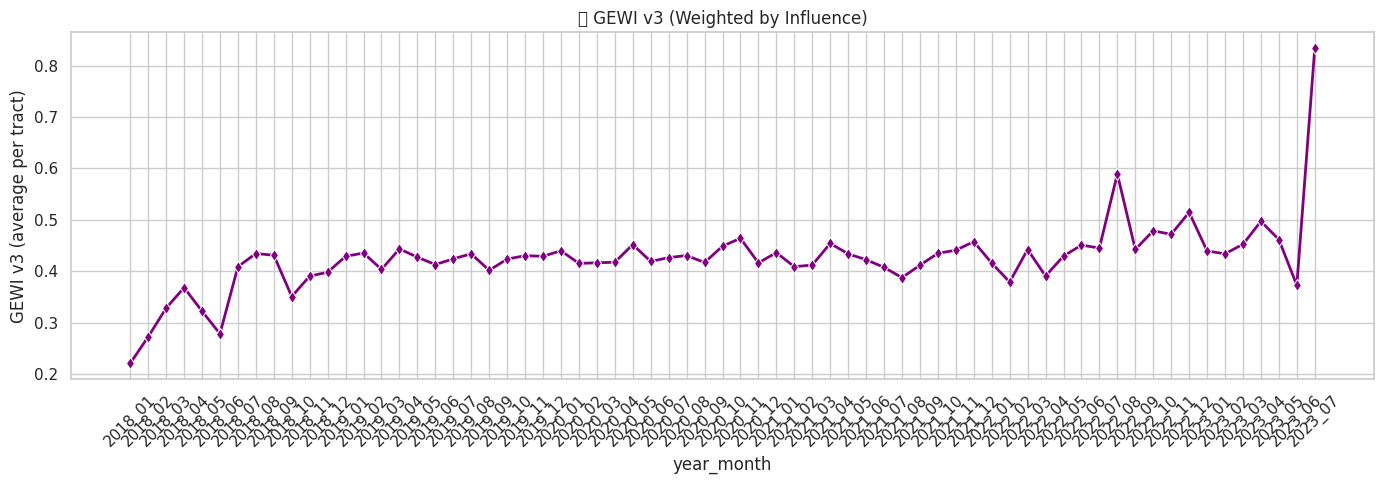

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the GEWI scores file
path = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/gewis_by_tract.csv"

# Load the file
df = pd.read_csv(path)

# Group by month and calculate averages
monthly_df = df.groupby("year_month").agg({
    "tweet_volume": "sum",
    "GEWI_v1": "mean",
    "GEWI_v2_pos": "mean",
    "GEWI_v2_neg": "mean",
    "GEWI_v3": "mean"
}).reset_index()

# Style
sns.set(style="whitegrid")

# 📊 Total tweet volume by month
plt.figure(figsize=(14, 5))
sns.lineplot(data=monthly_df, x="year_month", y="tweet_volume", marker="o", linewidth=2)
plt.xticks(rotation=45)
plt.title("📈 Total Tweet Volume by Month")
plt.ylabel("Number of Tweets")
plt.tight_layout()
plt.show()

# 📐 GEWI v1
plt.figure(figsize=(14, 5))
sns.lineplot(data=monthly_df, x="year_month", y="GEWI_v1", marker="s", linewidth=2)
plt.xticks(rotation=45)
plt.title("🔵 GEWI v1 (Composite Index)")
plt.ylabel("GEWI v1 (average per tract)")
plt.tight_layout()
plt.show()

# ➕ GEWI v2 POS and NEG
plt.figure(figsize=(14, 5))
sns.lineplot(data=monthly_df, x="year_month", y="GEWI_v2_pos", label="Positive", marker="^")
sns.lineplot(data=monthly_df, x="year_month", y="GEWI_v2_neg", label="Negative", marker="v")
plt.xticks(rotation=45)
plt.title("⚖️ GEWI v2 — Polarity Decomposition")
plt.ylabel("GEWI v2 Average (per tract)")
plt.legend()
plt.tight_layout()
plt.show()

# 🎯 GEWI v3
plt.figure(figsize=(14, 5))
sns.lineplot(data=monthly_df, x="year_month", y="GEWI_v3", marker="d", color="purple", linewidth=2)
plt.xticks(rotation=45)
plt.title("🧠 GEWI v3 (Weighted by Influence)")
plt.ylabel("GEWI v3 (average per tract)")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import os

# Example path to inspect a file with census tract mapping
path = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/mapeado_setores_v2/"
files = sorted([f for f in os.listdir(path) if f.endswith(".csv.gz")])
df = pd.read_csv(os.path.join(path, files[0]))

print("🧾 Available columns:")
print(df.columns.tolist())

# Display a sample of relevant columns for GEWI v3
print("\n🔍 Sample:")
print(df[["text", "followers"]].head())  # Will raise an error if 'followers' column is missing

🧾 Available columns:
['message_id', 'date', 'text', 'tags', 'tweet_lang', 'source', 'place', 'geom', 'retweets', 'tweet_favorites', 'photo_url', 'quoted_status_id', 'user_id', 'user_name', 'user_location', 'followers', 'friends', 'user_favorites', 'status', 'user_lang', 'latitude', 'longitude', 'data_source', 'GPS', 'spatialerror', 'similaridade', 'score', 'CD_SETOR', 'mapeado_setor']

🔍 Sample:
                                                text  followers
0  Deu um puta raio e queimou a tomada do modem q...      213.0


In [ ]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm

# Path to census tract-mapped tweet files
input_path = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/mapeado_setores_v2/"
output_path = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/"
os.makedirs(output_path, exist_ok=True)

# List files
files = sorted([f for f in os.listdir(input_path) if f.endswith(".csv.gz")])

# List to store results
results = []

print("📊 Recalculating GEWI v3 with influence weights...")

for file in tqdm(files, desc="Processing files"):
    df = pd.read_csv(os.path.join(input_path, file))

    # Extract year-month from filename
    year_month = file.replace("tweets_tramontina_", "").replace(".csv.gz", "")

    if df.empty or "score" not in df.columns or "followers" not in df.columns:
        continue

    # Remove rows with missing geolocation or weights
    df = df.dropna(subset=["CD_SETOR", "score", "followers"])

    # Apply influence weight: log(1 + followers)
    df["influence_weight"] = np.log1p(df["followers"].clip(lower=0))  # clip avoids negative log input

    # Calculate weighted GEWI v3 by tract
    grouped = df.groupby("CD_SETOR")
    for tract_id, group in grouped:
        n = len(group)
        weight_sum = group["influence_weight"].sum()

        if weight_sum > 0:
            gewi_v3 = (group["score"] * group["influence_weight"]).sum() / weight_sum * np.log1p(n)
        else:
            gewi_v3 = 0  # or np.nan if preferred

        results.append({
            "year_month": year_month,
            "CD_SETOR": tract_id,
            "GEWI_v3_recalculated": gewi_v3,
            "tweet_volume": n
        })

# Save new CSV with recalculated GEWI v3
df_final = pd.DataFrame(results)
df_final.to_csv(os.path.join(output_path, "gewiv3_recalculated.csv"), index=False)
print("✅ New GEWI v3 successfully saved.")

📊 Recalculating GEWI v3 with influence weights...


Processing files: 100%|██████████| 68/68 [00:01<00:00, 47.08it/s]

✅ New GEWI v3 successfully saved.


In [ ]:
## Visualization of GEWI v3 with Influence Weights

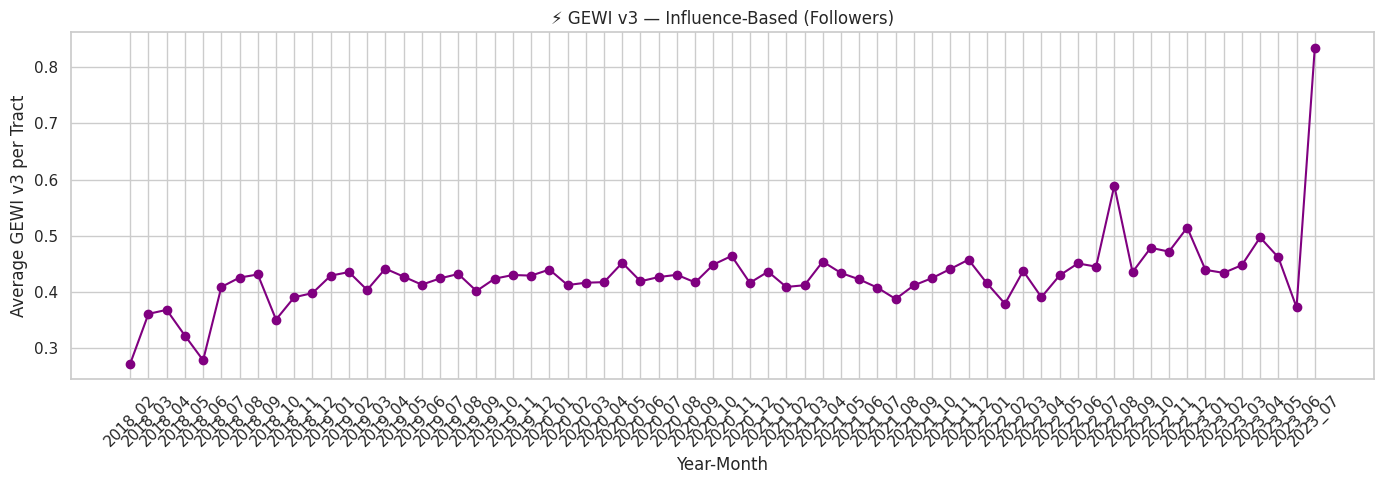

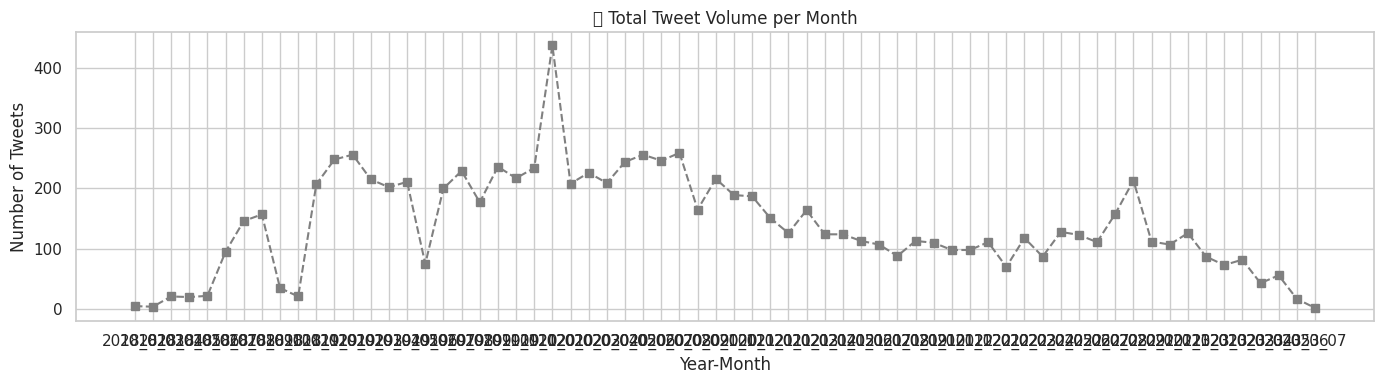

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the file with recalculated GEWI v3
path = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/gewiv3_recalculated.csv"

# Load the data
df = pd.read_csv(path)
df["year_month"] = df["year_month"].astype(str)

# Sort chronologically
df = df.sort_values("year_month")

# Group by month (average across tracts)
monthly_df = df.groupby("year_month").agg({
    "GEWI_v3_recalculated": "mean",
    "tweet_volume": "sum"
}).reset_index()

# 🎨 Visual style
sns.set(style="whitegrid")

# 📈 GEWI v3 with influence weights
plt.figure(figsize=(14, 5))
plt.plot(monthly_df["year_month"], monthly_df["GEWI_v3_recalculated"], marker="o", color="purple")
plt.xticks(rotation=45)
plt.title("⚡ GEWI v3 — Influence-Based (Followers)")
plt.ylabel("Average GEWI v3 per Tract")
plt.xlabel("Year-Month")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📊 Tweet volume per month (for context)
plt.figure(figsize=(14, 4))
plt.plot(monthly_df["year_month"], monthly_df["tweet_volume"], marker="s", linestyle="--", color="gray")
plt.title("📊 Total Tweet Volume per Month")
plt.ylabel("Number of Tweets")
plt.xlabel("Year-Month")
plt.grid(True)
plt.tight_layout()
plt.show()

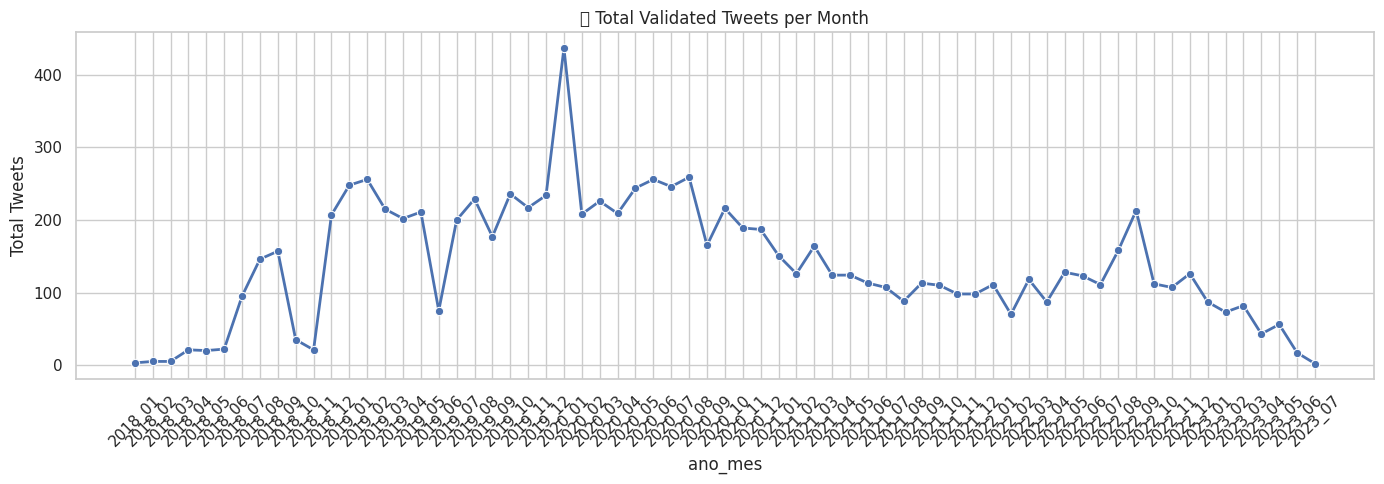

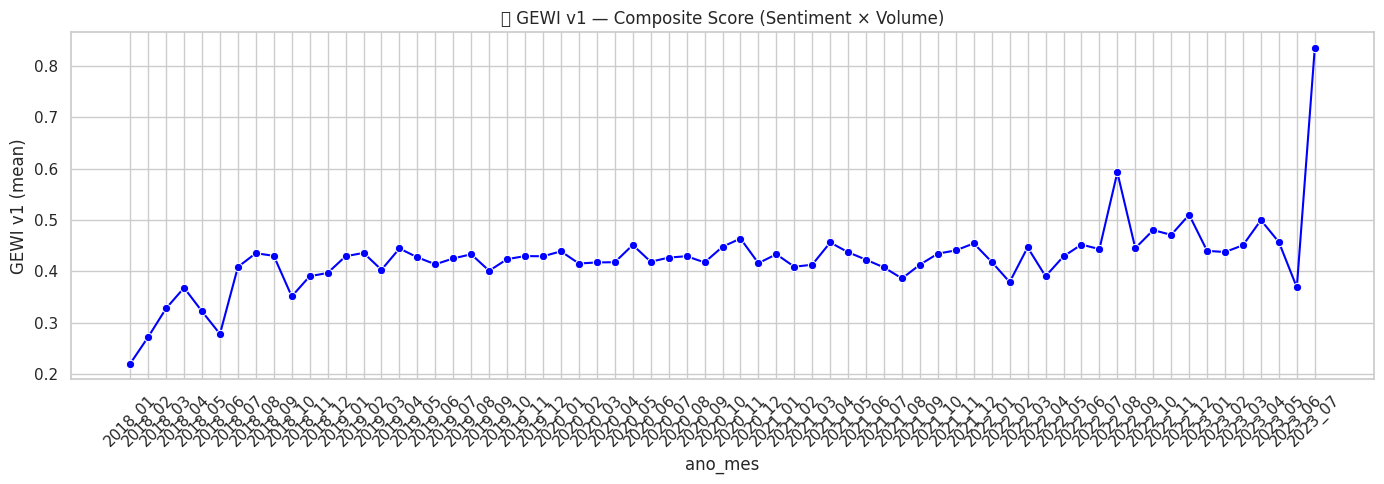

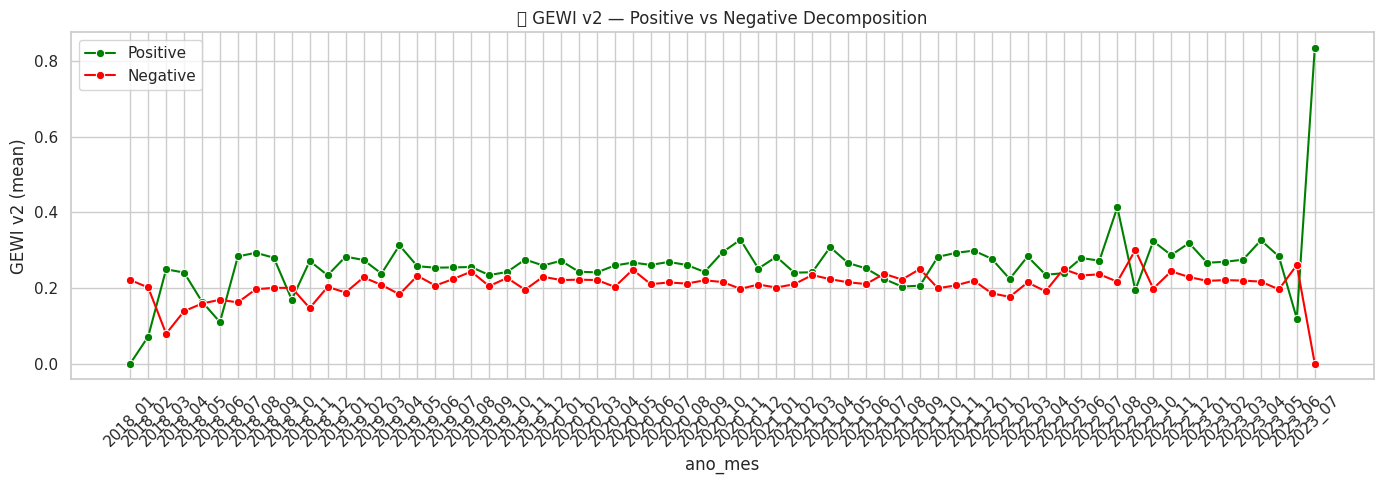

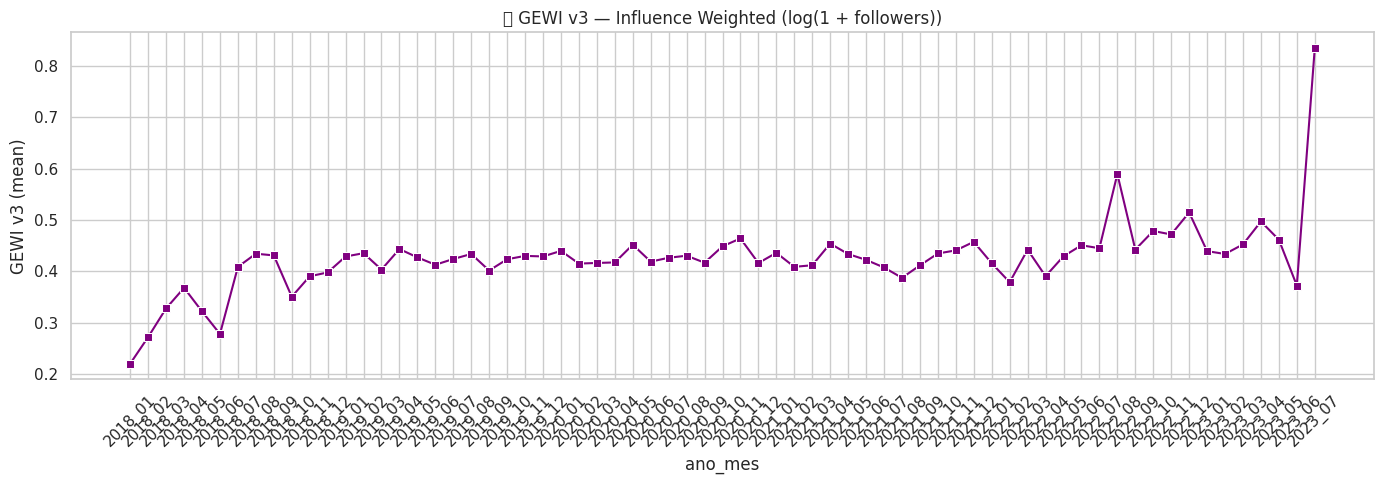

In [ ]:
# ✅ Final Visualization of GEWIs by Month (Census Tracts)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the final GEWI file
path = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/gewis_por_setor.csv"

# Load the dataset
df = pd.read_csv(path)

# 📦 Rename columns for consistency
df = df.rename(columns={
    "GEWI_v1": "gewiv1",
    "GEWI_v2_pos": "gewiv2_pos",
    "GEWI_v2_neg": "gewiv2_neg",
    "GEWI_v3": "gewiv3",
    "volume_tweets": "n_tweets"
})

# 📊 Aggregate by month
monthly_df = df.groupby("ano_mes").agg({
    "n_tweets": "sum",
    "gewiv1": "mean",
    "gewiv2_pos": "mean",
    "gewiv2_neg": "mean",
    "gewiv3": "mean"
}).reset_index()

# 🎨 Visual style
sns.set(style="whitegrid")

# 📈 Total tweet volume
plt.figure(figsize=(14, 5))
sns.lineplot(data=monthly_df, x="ano_mes", y="n_tweets", marker="o", linewidth=2)
plt.xticks(rotation=45)
plt.title("📊 Total Validated Tweets per Month")
plt.ylabel("Total Tweets")
plt.tight_layout()
plt.grid(True)
plt.show()

# 📐 GEWI v1
plt.figure(figsize=(14, 5))
sns.lineplot(data=monthly_df, x="ano_mes", y="gewiv1", marker="o", color="blue")
plt.xticks(rotation=45)
plt.title("📈 GEWI v1 — Composite Score (Sentiment × Volume)")
plt.ylabel("GEWI v1 (mean)")
plt.tight_layout()
plt.grid(True)
plt.show()

# 💠 GEWI v2 — Positive and Negative
plt.figure(figsize=(14, 5))
sns.lineplot(data=monthly_df, x="ano_mes", y="gewiv2_pos", label="Positive", color="green", marker="o")
sns.lineplot(data=monthly_df, x="ano_mes", y="gewiv2_neg", label="Negative", color="red", marker="o")
plt.xticks(rotation=45)
plt.title("📈 GEWI v2 — Positive vs Negative Decomposition")
plt.ylabel("GEWI v2 (mean)")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

# 🧠 GEWI v3 — Influence Weighted
plt.figure(figsize=(14, 5))
sns.lineplot(data=monthly_df, x="ano_mes", y="gewiv3", marker="s", color="purple")
plt.xticks(rotation=45)
plt.title("💥 GEWI v3 — Influence Weighted (log(1 + followers))")
plt.ylabel("GEWI v3 (mean)")
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
## Verification of Influence Weighting in GEWI v3

In [ ]:
import pandas as pd
import numpy as np

# Load one month of data with census tract mapping and GEWI already calculated
path = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/mapeado_setores_v2/tweets_tramontina_2020_01.csv.gz"
df = pd.read_csv(path)

# Create the weight column used in GEWI v3
df["weight"] = np.log1p(df["followers"])

# Show basic statistics for the influence weights
print(df["weight"].describe())

# Compare unweighted and weighted sentiment averages
simple_mean = df["score"].mean()
weighted_mean = np.average(df["score"], weights=df["weight"])

print(f"\n📌 Simple sentiment mean: {simple_mean:.4f}")
print(f"📌 Weighted sentiment mean (GEWI v3): {weighted_mean:.4f}")

count    469.000000
mean       7.157161
std        1.567267
min        1.098612
25%        6.129050
50%        7.186901
75%        8.717518
max       10.579819
Name: weight, dtype: float64

📌 Simple sentiment mean: 0.5375
📌 Weighted sentiment mean (GEWI v3): 0.5520


In [ ]:
## Analysis of the Difference Between GEWI v3 and GEWI v1

In [ ]:
import pandas as pd

# Path to the consolidated GEWI file
path = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/gewis_por_setor.csv"

# Load the file
df = pd.read_csv(path)

# Check actual column names
print("📋 Available columns:")
print(df.columns.tolist())

# ✅ Compute the difference (adjust names if needed)
df["difference"] = df["GEWI_v3"] - df["GEWI_v1"]

# Show summary statistics for the difference
print("\n📊 Difference GEWI v3 - v1:")
print(df["difference"].describe())

📋 Available columns:
['ano_mes', 'CD_SETOR', 'GEWI_v1', 'GEWI_v2_pos', 'GEWI_v2_neg', 'GEWI_v3', 'volume_tweets']

📊 Difference GEWI v3 - v1:
count    4808.000000
mean       -0.000122
std         0.011578
min        -0.127991
25%         0.000000
50%         0.000000
75%         0.000000
max         0.252526
Name: difference, dtype: float64


In [ ]:
# ✅ Block 10 - Normalization of GEWI Indices to [-1, 1] Scale (Per Month)

#This step applies a MinMax normalization to GEWI v1, v2_pos, v2_neg, and v3 scores within each month,
#ensuring comparability across census tracts while preserving temporal structure.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 📂 Path to the original GEWI file
input_path = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/gewis_por_setor.csv"
output_path = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/gewis_scaled_-1_to_1.csv"

# 📥 Load the original data
df = pd.read_csv(input_path)

# 🎯 Columns to normalize
columns_to_scale = ["GEWI_v1", "GEWI_v2_pos", "GEWI_v2_neg", "GEWI_v3"]

# 📆 Group by month and apply MinMaxScaler to each group
scaled_dfs = []
for name, group in df.groupby("ano_mes"):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaled_values = scaler.fit_transform(group[columns_to_scale])

    scaled_group = group.copy()
    for idx, col in enumerate(columns_to_scale):
        scaled_group[f"{col}_scaled"] = scaled_values[:, idx]

    scaled_dfs.append(scaled_group)

# 🔗 Concatenate all scaled groups
df_scaled = pd.concat(scaled_dfs, ignore_index=True)

# 💾 Save the final DataFrame with scaled columns
df_scaled.to_csv(output_path, index=False)
print(f"✅ Scaled GEWI values saved to: {output_path}")

✅ Scaled GEWI values saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/gewis_scaled_-1_to_1.csv


In [ ]:
##Validation

In [ ]:
import pandas as pd

# Path to the scaled GEWI file
path = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/gewis_scaled_-1_to_1.csv"

# Load the data
df = pd.read_csv(path)

# Columns of interest
columns_to_display = [
    "ano_mes", "CD_SETOR", "GEWI_v1_scaled", "GEWI_v2_pos_scaled", "GEWI_v2_neg_scaled", "GEWI_v3_scaled"
]

# Show first 10 rows with scaled GEWI values
print("🔍 Sample of GEWI indices scaled to [-1, 1]:\n")
print(df[columns_to_display].head(10))

🔍 Sample of GEWI indices scaled to [-1, 1]:

   ano_mes      CD_SETOR  GEWI_v1_scaled  GEWI_v2_pos_scaled  \
0  2018_01  4.100103e+14        1.000000           -1.000000   
1  2018_01  4.311759e+14       -1.000000           -1.000000   
2  2018_01  5.208707e+14       -0.124083           -1.000000   
3  2018_02  3.108909e+14        0.123653           -1.000000   
4  2018_02  3.169307e+14       -1.000000           -1.000000   
5  2018_02  3.201902e+14       -0.384645           -1.000000   
6  2018_02  3.515400e+14        1.000000            1.000000   
7  2018_02  4.125100e+14        0.074764           -1.000000   
8  2018_03  2.208007e+14       -0.995307           -1.000000   
9  2018_03  2.603504e+14        0.553778            0.751244   

   GEWI_v2_neg_scaled  GEWI_v3_scaled  
0            1.000000        1.000000  
1           -1.000000       -1.000000  
2           -0.124083       -0.124083  
3            1.000000        0.123653  
4            0.364046       -1.000000  
5         

In [ ]:
## ✅ Block 11 - GEWI Normalization with Quality Flags per Month

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load original GEWI file
input_path = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/gewis_por_setor.csv"
output_path = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/gewis_scaled_flagged.csv"

df = pd.read_csv(input_path)
columns_to_scale = ["GEWI_v1", "GEWI_v2_pos", "GEWI_v2_neg", "GEWI_v3"]

flagged_data = []

for month, group in df.groupby("ano_mes"):
    scaled_group = group.copy()

    # Flag: unique row in month
    if len(group) == 1:
        for col in columns_to_scale:
            scaled_group[f"{col}_scaled"] = 0
        scaled_group["scaling_flag"] = "unique"

    else:
        scaler = MinMaxScaler(feature_range=(-1, 1))
        scaled_values = scaler.fit_transform(group[columns_to_scale])
        for idx, col in enumerate(columns_to_scale):
            scaled_group[f"{col}_scaled"] = scaled_values[:, idx]
        scaled_group["scaling_flag"] = "scaled"

    flagged_data.append(scaled_group)

# Final output
df_final = pd.concat(flagged_data, ignore_index=True)
df_final.to_csv(output_path, index=False)
print(f"✅ GEWI scaled and flagged values saved to: {output_path}")

✅ GEWI scaled and flagged values saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/gewis_scaled_flagged.csv


In [ ]:
## Validation

In [ ]:
import pandas as pd

# Path to the flagged and scaled GEWI file
path = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/gewis_scaled_flagged.csv"

# Load the file
df = pd.read_csv(path)

# Select columns for validation
columns = [
    "ano_mes", "CD_SETOR",
    "GEWI_v1", "GEWI_v1_scaled",
    "GEWI_v2_pos", "GEWI_v2_pos_scaled",
    "GEWI_v2_neg", "GEWI_v2_neg_scaled",
    "GEWI_v3", "GEWI_v3_scaled",
    "scaling_flag"
]

# Show 10 random rows
sample = df[columns].sample(n=10, random_state=42)
print("🔍 GEWI Validation Sample (original vs scaled):")
print(sample)

🔍 GEWI Validation Sample (original vs scaled):
      ano_mes      CD_SETOR   GEWI_v1  GEWI_v1_scaled  GEWI_v2_pos  \
1448  2019_10  2.933307e+14  0.302312       -0.802006     0.000000   
2932  2020_10  3.506003e+14  0.512681       -0.558635     0.512681   
794   2019_03  3.513801e+14  1.174862        0.545919     1.179844   
1029  2019_05  4.211900e+14  0.518168       -0.509232     0.469079   
8     2018_03  2.208007e+14  0.197847       -0.995307     0.000000   
1747  2019_12  4.202008e+14  0.267939       -0.859850     0.000000   
1846  2020_01  3.305109e+14  0.620183       -0.703114     0.440465   
254   2018_09  3.529005e+14  0.285045       -0.801274     0.000000   
3827  2021_10  4.201604e+14  0.238569       -0.922932     0.000000   
4103  2022_03  3.549706e+14  0.175169       -0.989511     0.000000   

      GEWI_v2_pos_scaled  GEWI_v2_neg  GEWI_v2_neg_scaled   GEWI_v3  \
1448           -1.000000     0.302312           -0.439997  0.302312   
2932           -0.459567     0.000000   

In [ ]:
## ✅ Block 12 - Consolidated GEWI per Census Tract (Static Long-Term Index)

In [ ]:
import pandas as pd

# Load the full monthly GEWI file
path = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/gewis_por_setor.csv"
df = pd.read_csv(path)

# Group by census tract (CD_SETOR) and compute mean across time
df_static = df.groupby("CD_SETOR").agg({
    "GEWI_v1": "mean",
    "GEWI_v2_pos": "mean",
    "GEWI_v2_neg": "mean",
    "GEWI_v3": "mean",
    "volume_tweets": "sum",  # Optional: total activity
}).reset_index()

# Save to file
output_path = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/gewis_static_by_tract.csv"
df_static.to_csv(output_path, index=False)
print(f"✅ Static GEWI by tract saved to: {output_path}")

✅ Static GEWI by tract saved to: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/gewis_static_by_tract.csv


In [ ]:
## Quality check

In [ ]:
import pandas as pd

# Path to the consolidated file with average GEWI per census tract
path = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/gewis_static_by_tract.csv"

# Load the file
df_static = pd.read_csv(path)

# Display the first few rows
print("🔍 Sample of consolidated GEWI values by census tract:")
print(df_static.head(10))  # Displays the first 10 rows; you can adjust the number

🔍 Sample of consolidated GEWI values by census tract:
       CD_SETOR   GEWI_v1  GEWI_v2_pos  GEWI_v2_neg   GEWI_v3  volume_tweets
0  1.100023e+14  0.402414     0.332137     0.070277  0.402414              3
1  1.100049e+14  0.292866     0.085069     0.207798  0.292295              7
2  1.100056e+14  0.204683     0.000000     0.204683  0.204683              1
3  1.100064e+14  0.655083     0.000000     0.655083  0.655083              7
4  1.100122e+14  0.338392     0.101089     0.237303  0.338692             13
5  1.100130e+14  0.340250     0.000000     0.340250  0.340250              1
6  1.100205e+14  0.404630     0.244630     0.186498  0.403565             36
7  1.100254e+14  0.428772     0.305449     0.123323  0.428772              2
8  1.100288e+14  0.262045     0.000000     0.262045  0.262045              5
9  1.100304e+14  0.329289     0.198295     0.130995  0.329289              6


In [ ]:
## Check - difference between GEWI_v1 e GEWI_v3

In [ ]:
import pandas as pd
import numpy as np

# Caminho do arquivo consolidado com os GEWIs
path = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/gewis_static_by_tract.csv"
df = pd.read_csv(path)

# Exibe as colunas para confirmar a presença dos GEWIs
print("📋 Colunas disponíveis no arquivo consolidado:", df.columns.tolist())

# Verifica as primeiras linhas do DataFrame para observar os valores
print("🔍 Amostra dos dados:")
print(df.head())

# Calcular a diferença entre GEWI_v1 e GEWI_v3, para verificar inconsistências
df['diferenca_GEWI'] = df['GEWI_v1'] - df['GEWI_v3']

# Exibe estatísticas básicas da diferença entre GEWI_v1 e GEWI_v3
print("\n📊 Estatísticas da diferença GEWI_v1 - GEWI_v3:")
print(df['diferenca_GEWI'].describe())

# Salvar a comparação para referência futura (opcional)
output_path = "/n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/gewis_comparacao.csv"
df.to_csv(output_path, index=False)
print(f"✅ Comparação dos GEWIs salva em: {output_path}")

📋 Colunas disponíveis no arquivo consolidado: ['CD_SETOR', 'GEWI_v1', 'GEWI_v2_pos', 'GEWI_v2_neg', 'GEWI_v3', 'volume_tweets']
🔍 Amostra dos dados:
       CD_SETOR   GEWI_v1  GEWI_v2_pos  GEWI_v2_neg   GEWI_v3  volume_tweets
0  1.100023e+14  0.402414     0.332137     0.070277  0.402414              3
1  1.100049e+14  0.292866     0.085069     0.207798  0.292295              7
2  1.100056e+14  0.204683     0.000000     0.204683  0.204683              1
3  1.100064e+14  0.655083     0.000000     0.655083  0.655083              7
4  1.100122e+14  0.338392     0.101089     0.237303  0.338692             13

📊 Estatísticas da diferença GEWI_v1 - GEWI_v3:
count    1222.000000
mean       -0.000043
std         0.002124
min        -0.043237
25%         0.000000
50%         0.000000
75%         0.000000
max         0.011801
Name: diferenca_GEWI, dtype: float64
✅ Comparação dos GEWIs salva em: /n/netscratch/cga/Lab/rpalbuquerque/GEWI 2.0/gewis_comparacao.csv


In [ ]:
#The difference between GEWI_v1 and GEWI_v3 is minimal, with a mean difference close to zero and a small standard deviation, indicating they are nearly identical.